# Project: Women's Participation in the Labor Force and Economic Power

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project was initially conceived by exploring the diverse datasets available on [Gapminder](https://www.gapminder.org/data/). The primary aim was to identify the factors that contribute to a country's economic strength. Recognizing that female labor force participation is frequently linked to economic strength, the objective was to ascertain if this relationship could be observed in the available data.

### Indicators Rationale

#### Income (GDP) per person (fixed 2000 USD)
- **Definition:** Gross Domestic Product per capita adjusted for inflation to constant 2000 USD, accounting for inflation but not for variations in the cost of living across countries.
- **Source:** [World Bank](http://www.worldbank.org/)
- **Rationale:** Recognized as a standardized measure of economic strength among countries. 
- **df Column:** income

#### Female employees age 15+ (% of population)
- **Definition:** The percentage of the female population aged 15 and older that was employed during the specified year
- **Source:** [International Labour Organization](http://www.ilo.org/emppolicy/lang--en/index.htm)
- **Rationale:** Used as a metric to assess female participation in the labor force.
- **df Column:** employ_above_15

#### Female agricultural workers (% of all female labor)
- **Definition:** The percentage of all female laborers employed in the agricultural sector.
- **Source:** [International Labour Organization](http://www.ilo.org/emppolicy/lang--en/index.htm)
- **Rationale:** Included to facilitate the exploration of the relationship between employment sectors and economic strength.
- **df Column:** agr

#### Female industry workers (% of all female labor)
- **Definition:** The percentage of all female laborers working in the industrial sector.
- **Source:** [International Labour Organization](http://www.ilo.org/emppolicy/lang--en/index.htm)
- **Rationale:** Included to examine the link between employment sectors and economic strength.
- **df Column:** ind

#### Female service workers (% of all female labor)
- **Definition:** The percentage of all female laborers employed in the service sector.
- **Source:** [International Labour Organization](http://www.ilo.org/emppolicy/lang--en/index.htm)
- **Rationale:** Included to analyze the relationship between employment sectors and economic strength.
- **df Column:** ser

#### Mean years in school (women 25 and older)
- **Definition:** The average number of years of schooling attended by individuals in the specified age and gender group, encompassing primary, secondary, and tertiary education.
- **Source:** [Institute for Health Metrics and Evaluation](http://www.healthmetricsandevaluation.org/)
- **Rationale:** Included to explore the connections between educational attainment (up to tertiary level) and economic strength, as well as the relationship between educational achievement and workforce participation across sectors.
- **df Column:** education

### Date Rationale
The original datasets underwent a thorough examination to assess their respective date ranges. The availability of data varied significantly across the different datasets. For GDP information, the data covered an extensive period from 1960 to 2011. In contrast, the employment sector data was more limited, with a range from 1980 to 2007. Initially, the intention was to use the data from 2007, as it was the most recent year available, which would typically provide the most up-to-date insights. However, upon further analysis, it became evident that the dataset for 2006 contained fewer missing entries compared to that of 2007. This finding was significant, as the presence of missing data could potentially skew the results and analysis. Consequently, the decision was made to utilize the data from 2006 instead, ensuring a more complete and reliable dataset for the project.

### Original Research Questions
The initial questions formulated for the dataset were as follows:
1. Is there a relationship between female participation in the workforce and economic strength?
2. Are specific types of female employment more closely associated with economic strength?
3. How does participation in years of education correlate with economic strength?
4. Is there a connection between years of education participation and workforce participation?

### Additional Research
To investigate the relationship between employment sectors and the other variables, it was essential to assess whether the three employment categories—agriculture, industry, and service—adequately represented female labor participation. Initial analysis, detailed below, indicated that these categories effectively captured the relevant data; however, some results raised questions that prevented a conclusive determination. To address this, additional research was conducted to explore whether there were alternative insights regarding the methodology used for gathering the datasets or their intended applications. This further investigation aimed to clarify any uncertainties and enhance the overall analysis of female labor participation within the context of economic strength. 

The working paper by the International Labour Organization (ILO) titled [Female labour force participation in India and beyond](http://www.ilo.org/newdelhi/whatwedo/publications/WCMS_324621/lang--en/index.htm), authored by Ruchika Chaudhary and Sher Verick, served as a foundational resource for the rest of this project. Its insights and findings guided the methodology and analysis, providing essential context and frameworks for examining female labor force participation in relation to economic strength.

**The paper confirmed the following key points:**
- GDP per capita is widely recognized as a reliable metric for assessing a country's economic strength.
- The three employment sectors—agriculture, industry, and service—are standard classifications used to capture areas of employment.
- Established relationships exist between participation in education and workforce engagement, as well as between these factors and economic strength.

**The paper also highlighted additional considerations:**
- The logarithm of GDP is often utilized for comparison purposes due to potential data skew.
- Findings from cross-country analyses regarding the relationship between female labor force participation (FLFP) and economic strength are varied, suggesting a U-shaped correlation, where higher FLFP is associated with both increased and decreased economic strength.
- Consequently, FLFP is not universally perceived as a positive indicator, as women may be compelled to enter the workforce due to financial pressures within their families, particularly during economic downturns. This participation often occurs at lower rates and under less favorable working conditions than those experienced by men.
- While increased years of education may initially lower employment rates among younger women, education typically fosters greater workforce participation upon completion and is generally linked to more favorable employment outcomes and conditions.
- Traditional economic development patterns indicate that higher participation in industry jobs (as opposed to agriculture) and, more recently, service jobs, signals economic health. 

**Additional statistics include:**
- Women's participation in the labor market remained relatively stable from 1993 to 2013, suggesting that the selection of 2006 data over 2007 should not significantly impact the conclusions drawn based on recency.
- Women comprise approximately 40% of the global labor force.
- Rates of female labor force participation vary significantly across different global regions. 

### Amended Research Questions 
Based on the insights gleaned from the paper, some of the original questions were revised, and new questions were introduced, resulting in the following final question set:
1. How does economic strength vary globally?
2. How does women's participation in the workforce differ across various regions?
3. How does women's participation in education change around the world?
4. Does the selected data support the theory of a U-shaped relationship between female labor force participation (FLFP) and economic strength?
5. Is there a discernible relationship between employment sector and economic strength within the data?
6. Is there a positive correlation between economic strength and participation in education?
7. Does the selected data reveal relationships between education participation and overall FLFP, as well as within the three employment sectors?

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

All datasets were organized into separate spreadsheets, each with varying date ranges and countries for which data was available. Using Excel, a CSV file was generated that compiled the country list along with the relevant metrics for 2006 from each dataset. This consolidated file served as a central reference for further analysis, enabling easier comparison and evaluation of the data across different sources. 

### Joining Datasets and Managing Missing Data Rationale
Decisions were necessary regarding how to join the various datasets and how to address missing values. The selection of joining methods was considered alongside the management of missing data, as the chosen methods could significantly affect data loss. A key question emerged: should inner joins be applied to all datasets to preserve only the common values, or should the joining methods prioritize the retention of data, even if it does not overlap across all variables?

To inform this decision, a resource on [missing values](http://www.mosaicdatascience.com/blogs/data-science-design-pattern-3-handling-null-values/) was utilized, which provided valuable insights into handling null values. Specifically, it highlighted several important considerations:
- The nature of the missing values should be assessed: whether they are missing completely at random (MCAR), missing at random (MAR), or missing not at random (MNAR). Each scenario requires a distinct approach to handling null values.
- Different variables within a dataset may necessitate varying strategies for managing missing data, and multiple approaches might be needed for a single variable.
- Null deletion should be employed judiciously, specifically when: "You are confident that the null values are MCAR," and, "The data are sufficiently abundant, or the records containing nulls are sufficiently sparse, so that your sample size will not change substantially as a result of deleting those records."

In this case, it was determined that the missing data were missing not at random (MNAR). It was hypothesized that countries with lower economic development levels would be more prone to missing data. To enhance the representation of these less economically developed countries, and recognizing the relatively small size of the initial dataset, it was decided that if a country had data available in at least one of the categories, it would be included. Consequently, missing values would be managed using a pair-wise deletion approach rather than a case-wise deletion method. Based on this strategy, the most suitable joining method was identified as an outer join, allowing for the maximum retention of available data while acknowledging the presence of missing values.

### Import and Join Datasets
**Income per Person:**

Use the Requests library to download the GDP per capita (GDPpercapita.csv)

In [2]:
#Download the URL programmatically then read the .csv file into a pandas dataframe
url = "https://drive.google.com/uc?export=download&id=1cssX-GT0iCsA91Ic4uJyDSiR7SME1Hx3"
response = requests.get(url)

with open('GDPpercapita.csv', mode ='wb') as file:
    file.write(response.content)

In [3]:
#Read the .csv file
df_income = pd.read_csv('GDPpercapita.csv')
df_income.head(10)

country        income
0               Abkhazia           NaN
1            Afghanistan           NaN
2  Akrotiri and Dhekelia           NaN
3                Albania   1594.495067
4                Algeria   2124.957754
5         American Samoa           NaN
6                Andorra  21595.395480
7                 Angola    473.136344
8               Anguilla           NaN
9    Antigua and Barbuda  12452.282040

In [4]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  275 non-null    object 
 1   income   193 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


In [5]:
# Remove duplicate rows
df_income = df_income.drop_duplicates()

In [6]:
# Assert that there are no duplicate rows remaining
assert len(df_income) == len(df_income.drop_duplicates())

In [7]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  275 non-null    object 
 1   income   193 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


In [8]:
193 / 275

0.7018181818181818

The income dataset includes 275 countries, but around 30% of them have missing data. 

**Female employment participation:**

In [9]:
df_employ = pd.read_csv('Data/employ_above_15.csv')
df_employ.head()

country  employ_above_15
0  Afghanistan        26.200001
1      Albania        41.900002
2      Algeria        30.500000
3       Angola        69.199997
4    Argentina        45.799999

In [10]:
df_employ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          178 non-null    object 
 1   employ_above_15  178 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB


In [11]:
# Remove duplicate rows
df_employ = df_employ.drop_duplicates()

In [12]:
# Assert that there are no duplicate rows remaining
assert len(df_employ) == len(df_employ.drop_duplicates())

In [13]:
df_employ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          178 non-null    object 
 1   employ_above_15  178 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB


This dataset has no missing values, but it includes fewer countries compared to the income dataset. The employment data is already in `float` format, so no conversion is necessary. It is important to note that the percentages are expressed as whole numbers out of 100, rather than as decimal values.

**Female agricultural sector employment:**

In [14]:
df_agr = pd.read_csv('Data/agr_employ.csv')
df_agr.head(10)

country        agr
0              Algeria        NaN
1       American Samoa        NaN
2             Anguilla        NaN
3  Antigua and Barbuda        NaN
4            Argentina   0.300000
5              Armenia  46.099998
6                Aruba        NaN
7            Australia   2.400000
8              Austria   5.700000
9           Azerbaijan  36.700001

In [15]:
df_agr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  162 non-null    object 
 1   agr      85 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


In [16]:
# Remove duplicate rows
df_agr = df_agr.drop_duplicates()

In [17]:
# Assert that there are no duplicate rows remaining
assert len(df_agr) == len(df_agr.drop_duplicates())

In [18]:
df_agr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  162 non-null    object 
 1   agr      85 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


In [19]:
85 / 162

0.5246913580246914

The agriculture sector dataset includes an even smaller list of countries compared to the previous two datasets, with data available for approximately half of the listed countries. The float data type is consistent, and percentages are still expressed as whole numbers out of 100, maintaining the same formatting as the other datasets.

**Female industrial sector employment:**

In [20]:
df_ind = pd.read_csv('Data/ind_employ.csv')
df_ind.head(10)

country   ind
0              Algeria   NaN
1       American Samoa   NaN
2             Anguilla   NaN
3  Antigua and Barbuda   NaN
4            Argentina  10.9
5              Armenia   9.5
6                Aruba   NaN
7            Australia   9.1
8              Austria  13.4
9           Azerbaijan   9.0

In [21]:
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  162 non-null    object 
 1   ind      85 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


In [22]:
# Remove duplicate rows
df_ind = df_ind.drop_duplicates()

In [23]:
# Assert that there are no duplicate rows remaining
assert len(df_ind) == len(df_ind.drop_duplicates())

In [24]:
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  162 non-null    object 
 1   ind      85 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


The fact that the number of countries and the amount of available data for both the agricultural and industrial sectors are the same suggests that the data is consistent across countries for these sectors. 

The `float` data type remains unchanged, and the percentages continue to be formatted as whole numbers out of 100, ensuring uniformity in data representation. This consistency across sectors allows for more straightforward comparisons and analysis within the dataset.

**Female services employment:**

In [25]:
df_ser = pd.read_csv('Data/ser_employ.csv')
df_ser.head(10)

country        ser
0              Algeria        NaN
1       American Samoa        NaN
2             Anguilla        NaN
3  Antigua and Barbuda        NaN
4            Argentina  88.500000
5              Armenia  44.500000
6                Aruba        NaN
7            Australia  88.199997
8              Austria  80.900002
9           Azerbaijan  54.299999

In [26]:
df_ser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  162 non-null    object 
 1   ser      85 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


In [27]:
# Remove duplicate rows
df_ser = df_ser.drop_duplicates()

In [28]:
# Assert that there are no duplicate rows remaining
assert len(df_ser) == len(df_ser.drop_duplicates())

In [29]:
df_ser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  162 non-null    object 
 1   ser      85 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


In [30]:
df_sector = df_agr.merge(df_ind, on='country', how='inner')
df_sector = df_sector.merge(df_ser, on='country', how='inner')
df_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  162 non-null    object 
 1   agr      85 non-null     float64
 2   ind      85 non-null     float64
 3   ser      85 non-null     float64
dtypes: float64(3), object(1)
memory usage: 5.2+ KB


Once again, the data types and percent formatting remain consistent across the datasets.

The join information confirms that employment sector data is available for the same 85 countries, ensuring that all employment sector comparisons will be made across a consistent subset of countries, despite the smaller dataset.

#### Confirming Completeness of Employment Sector Data
The employment sectors were examined to assess whether they adequately captured the majority of overall employment participation. This step was crucial to verify the completeness and reliability of the data for meaningful analysis.

In [31]:
df_agr_nona = df_agr.dropna().rename(columns={'agr': 'type'})
df_ind_nona = df_ind.dropna().rename(columns={'ind': 'type'})
df_ser_nona = df_ser.dropna().rename(columns={'ser': 'type'})
total_type = df_agr_nona + df_ind_nona + df_ser_nona
total_type.head()

country        type
4     ArgentinaArgentinaArgentina   99.700000
5           ArmeniaArmeniaArmenia  100.099998
7     AustraliaAustraliaAustralia   99.699997
8           AustriaAustriaAustria  100.000001
9  AzerbaijanAzerbaijanAzerbaijan  100.000000

The initial examination indicated that the three sectors adequately captured the majority of employment. It was noted that any values exceeding 100% might be attributed to rounding errors.

To further assess the data distribution, a histogram was generated to analyze the range of values within the dataset. This visual representation provided insights into the frequency and distribution of employment across the sectors, allowing for a clearer understanding of how the data is spread.

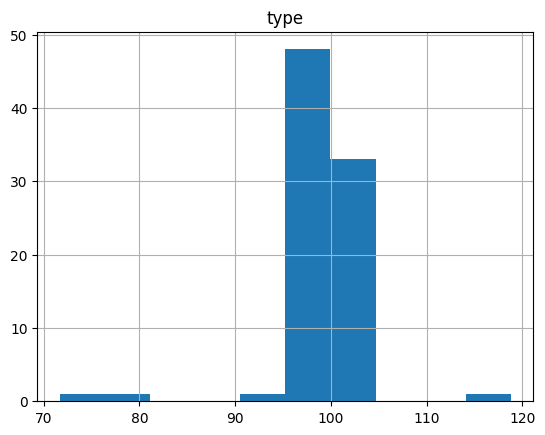

In [32]:
total_type.hist();

The histogram revealed several countries with employment participation rates below 99%, as well as at least one country with a rate exceeding 100%. Following this observation, a detailed examination of these countries was conducted to understand the reasons behind the discrepancies in their reported employment rates. This analysis aimed to identify potential data anomalies, rounding errors, or other factors that could explain the variations observed in the employment sector data.

In [33]:
total_type.query('type < 99')

country       type
63                               IcelandIcelandIceland  97.500001
72                                     JapanJapanJapan  98.900002
87                            MaldivesMaldivesMaldives  94.800001
129                              SenegalSenegalSenegal  79.900000
137                        Sri LankaSri LankaSri Lanka  71.700002
158  West Bank and GazaWest Bank and GazaWest Bank ...  98.399999

No clear pattern emerged for countries with total employment participation rates below 99%. However, since the ILO report focused solely on these three categories in its analysis, it was concluded that they were sufficient for this study without the need to seek additional data. This decision allowed for a more streamlined approach, relying on established data that effectively represents employment participation across the specified sectors.

In [34]:
total_type.query('type > 101')

country        type
56  GuatemalaGuatemalaGuatemala  118.799999

Further examination was carried out to analyze the combined employment participation rates for the three sectors in Guatemala. This analysis aimed to assess how the contributions from agriculture, industry, and services interacted to provide a comprehensive view of total employment in the country. By evaluating the combined data for Guatemala, insights could be gained into the sectoral distribution of employment and its implications for the overall economic context of the country.

In [35]:
print(df_agr.query('country == "Guatemala"'), '\n')
print(df_ind.query('country == "Guatemala"'), '\n')
print(df_ser.query('country == "Guatemala"'))

      country   agr
56  Guatemala  19.1 

      country   ind
56  Guatemala  24.6 

      country        ser
56  Guatemala  75.099998


There was a consideration to exclude Guatemala from the analysis due to potential errors in the reported data. However, it was recognized that workers can participate in multiple sectors, which may explain the total employment figure exceeding 100%. Since information regarding the data gathering methodology was not available, it was decided to retain Guatemala in the dataset. Each sector was intended to be analyzed individually rather than as a combined value, allowing for a more accurate representation of employment participation within the country.

**Female average years of education:**

In [36]:
df_edu = pd.read_csv('Data/years_education.csv')
df_edu.head(10)

country  education
0          Afghanistan        0.3
1              Albania        8.9
2              Algeria        3.8
3               Angola        2.5
4  Antigua and Barbuda       11.9
5            Argentina        9.8
6              Armenia       11.0
7            Australia       11.3
8              Austria       10.7
9           Azerbaijan       10.9

In [37]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    175 non-null    object 
 1   education  175 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB


In [38]:
# Remove duplicate rows
df_edu = df_edu.drop_duplicates()

In [39]:
# Assert that there are no duplicate rows remaining
assert len(df_edu) == len(df_edu.drop_duplicates())

In [40]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    175 non-null    object 
 1   education  175 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB


This dataset contains no missing data; however, the number of countries is fewer than that in the income dataset. The `float` data type and percentage formatting remain consistent throughout.

#### Merging the Datasets
As mentioned earlier, outer joins were utilized for all datasets to maximize data retention. This approach allows for comprehensive analysis and enables further examination moving forward, ensuring that the merged dataset retains as much information as possible for subsequent evaluations.

In [41]:
df = df_income.merge(df_employ, left_on='country', right_on='country', how='outer')
df = df.merge(df_agr, on='country', how='outer')
df = df.merge(df_ind, on='country', how='outer')
df = df.merge(df_ser, on='country', how='outer')
df = df.merge(df_edu, on='country', how='outer')
df.head(15)

country        income  employ_above_15        agr   ind  \
0                Abkhazia           NaN              NaN        NaN   NaN   
1             Afghanistan           NaN        26.200001        NaN   NaN   
2   Akrotiri and Dhekelia           NaN              NaN        NaN   NaN   
3                 Albania   1594.495067        41.900002        NaN   NaN   
4                 Algeria   2124.957754        30.500000        NaN   NaN   
5          American Samoa           NaN              NaN        NaN   NaN   
6                 Andorra  21595.395480              NaN        NaN   NaN   
7                  Angola    473.136344        69.199997        NaN   NaN   
8                Anguilla           NaN              NaN        NaN   NaN   
9     Antigua and Barbuda  12452.282040              NaN        NaN   NaN   
10              Argentina   8717.176296        45.799999   0.300000  10.9   
11                Armenia   1253.813300        33.700001  46.099998   9.5   
12                  Aruba           NaN              NaN        NaN   NaN   
13              Australia  24295.081380        54.599998   2.400000   9.1   
14                Austria  26171.690910        49.400002   5.700000  13.4   

          ser  education  
0         NaN        NaN  
1         NaN        0.3  
2         NaN        NaN  
3         NaN        8.9  
4         NaN        3.8  
5         NaN        NaN  
6         NaN        NaN  
7         NaN        2.5  
8         NaN        NaN  
9         NaN       11.9  
10  88.500000        9.8  
11  44.500000       11.0  
12        NaN        NaN  
13  88.199997       11.3  
14  80.900002       10.7

#### Manage missing values

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          287 non-null    object 
 1   income           193 non-null    float64
 2   employ_above_15  178 non-null    float64
 3   agr              85 non-null     float64
 4   ind              85 non-null     float64
 5   ser              85 non-null     float64
 6   education        175 non-null    float64
dtypes: float64(6), object(1)
memory usage: 15.9+ KB


Using outer joins increased the original country list from 275 to 287. However, upon reviewing the first few rows of the dataframe, it became evident that some countries were missing data for all variables. To address this issue, it was decided to remove any countries with no data across the other variables. This was accomplished by using the `thresh=2` argument with the `dropna` function, ensuring that only countries with at least one data point were retained in the dataset. This approach helped maintain a more robust dataset for analysis while eliminating countries that contributed no useful information.

In [43]:
# Check for missing values
print(df.isnull().sum())

country              1
income              95
employ_above_15    110
agr                203
ind                203
ser                203
education          113
dtype: int64


In [44]:
df.dropna(thresh=2, inplace=True)
df.head()

country        income  employ_above_15  agr  ind  ser  education
1  Afghanistan           NaN        26.200001  NaN  NaN  NaN        0.3
3      Albania   1594.495067        41.900002  NaN  NaN  NaN        8.9
4      Algeria   2124.957754        30.500000  NaN  NaN  NaN        3.8
6      Andorra  21595.395480              NaN  NaN  NaN  NaN        NaN
7       Angola    473.136344        69.199997  NaN  NaN  NaN        2.5

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 1 to 284
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          215 non-null    object 
 1   income           193 non-null    float64
 2   employ_above_15  178 non-null    float64
 3   agr              85 non-null     float64
 4   ind              85 non-null     float64
 5   ser              85 non-null     float64
 6   education        175 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.4+ KB


This process resulted in a final dataset comprising 215 countries, the majority of which contained data on `income`, `employ_above_15` and `education`. Additionally, 85 countries had information on employment sectors.

**Comparison Across Global Regions**
To facilitate future analysis, the data was organized into global regions based on [classifications by the United Nations](https://en.wikipedia.org/wiki/United_Nations_Regional_Groups) (UN). This categorization aligns with the United Nations Regional Groups, allowing for easier comparisons and insights across different geographic areas.

In [46]:
df_regions = pd.read_csv('Data/country_regions.csv')
df_regions.head()

country  region
0       Algeria  Africa
1        Angola  Africa
2         Benin  Africa
3      Botswana  Africa
4  Burkina Faso  Africa

In [47]:
# Remove duplicate rows
df_regions = df_regions.drop_duplicates()
# Assert that there are no duplicate rows remaining
assert len(df_regions) == len(df_regions.drop_duplicates())

In [48]:
df = df.merge(df_regions, on='country', how='left')
df.head()

country        income  employ_above_15  agr  ind  ser  education  \
0  Afghanistan           NaN        26.200001  NaN  NaN  NaN        0.3   
1      Albania   1594.495067        41.900002  NaN  NaN  NaN        8.9   
2      Algeria   2124.957754        30.500000  NaN  NaN  NaN        3.8   
3      Andorra  21595.395480              NaN  NaN  NaN  NaN        NaN   
4       Angola    473.136344        69.199997  NaN  NaN  NaN        2.5   

                     region  
0              Asia-Pacific  
1            Eastern Europe  
2                    Africa  
3  Western Europe and Other  
4                    Africa

The dataframe was examined to identify any missing values in the `region` column. This inspection aimed to ensure that all countries were appropriately categorized into their respective global regions, as missing region data could impact the analysis and comparisons across different geographic areas. By verifying the presence of `region` values, the integrity of the dataset could be maintained for subsequent evaluations.

In [49]:
no_region = df[df.region.isnull()]
no_region

country        income  employ_above_15        agr  \
19                          Bermuda  65430.601310              NaN        NaN   
25                           Brunei  18745.804770        54.900002        NaN   
32                       Cape Verde   1613.584414        42.400002        NaN   
33                   Cayman Islands           NaN              NaN   1.000000   
36                  Channel Islands  42994.345910              NaN        NaN   
41                 Congo, Dem. Rep.     94.769735        51.000000        NaN   
42                      Congo, Rep.   1150.392879        52.599998        NaN   
44                    Cote d'Ivoire    572.297134        38.200001        NaN   
69                        Greenland  20556.634740              NaN        NaN   
71                       Guadeloupe           NaN        39.000000        NaN   
78                 Hong Kong, China  32952.712130        50.200001   0.200000   
86                      Isle of Man  27612.483880              NaN   0.700000   
94                         Kiribati    769.219441              NaN        NaN   
96                           Kosovo   1614.513440              NaN        NaN   
98                  Kyrgyz Republic    325.862865              NaN        NaN   
99                              Lao    435.664578              NaN        NaN   
108                    Macao, China  24595.653170        57.400002   0.200000   
109                  Macedonia, FYR   1993.122150        26.299999  20.299999   
117                      Martinique           NaN        38.900002        NaN   
121           Micronesia, Fed. Sts.   2185.269074              NaN        NaN   
132            Netherlands Antilles           NaN        46.200001        NaN   
148                     Puerto Rico  18053.787210        33.799999   0.400000   
150                         Reunion           NaN        34.900002        NaN   
154             St. Kitts and Nevis  10607.877400              NaN        NaN   
155                       St. Lucia   5315.874333              NaN        NaN   
156  St. Vincent and the Grenadines   4872.784507              NaN        NaN   
159           Sao Tome and Principe           NaN              NaN        NaN   
163           Serbia and Montenegro           NaN        39.099998        NaN   
167                 Slovak Republic   7334.109759        43.299999   2.400000   
179                           Syria   1368.930491        16.299999        NaN   
180                          Taiwan           NaN        46.500000        NaN   
182                        Tanzania    394.224159        76.099998  80.000000   
201              West Bank and Gaza           NaN        11.500000  34.299999   
206            Central African Rep.           NaN        63.099998        NaN   
207                      Czech Rep.           NaN        46.099998   2.800000   
208                  Dominican Rep.           NaN        40.299999        NaN   
209                Korea, Dem. Rep.           NaN        56.000000        NaN   
210                     Korea, Rep.           NaN        48.599998   8.600000   
213                     Yemen, Rep.           NaN        20.500000        NaN   

           ind        ser  education region  
19         NaN        NaN        NaN    NaN  
25         NaN        NaN        NaN    NaN  
32         NaN        NaN        3.1    NaN  
33    3.600000  95.500000        NaN    NaN  
36         NaN        NaN        NaN    NaN  
41         NaN        NaN        3.6    NaN  
42         NaN        NaN        4.8    NaN  
44         NaN        NaN        1.7    NaN  
69         NaN        NaN        NaN    NaN  
71         NaN        NaN        NaN    NaN  
78    6.300000  93.500000        NaN    NaN  
86    3.900000  95.400002        NaN    NaN  
94         NaN        NaN        8.6    NaN  
96         NaN        NaN        NaN    NaN  
98         NaN        NaN        NaN    NaN  
99         NaN        NaN        NaN    NaN  
108  

In [50]:
df.region.isnull().sum()

39

In [51]:
no_region.to_csv('no_region.csv', index=False)

A total of 39 countries were found to have missing values in the region column. Upon visual inspection, it was determined that some of the missing data resulted from inconsistencies in country names across the datasets, while others may be attributed to a lack of UN recognition or participation for certain countries. To address this issue, the original resource was referenced to accurately populate the region values for these countries, ensuring that all entries in the dataset were properly categorized for further analysis.

In [52]:
missing_region = pd.read_csv('Data/missing_region.csv')
missing_region.head()

country        region
0               Bermuda        non-UN
1                Brunei  Asia-Pacific
2            Cape Verde        Africa
3        Cayman Islands        non-UN
4  Central African Rep.        Africa

In [53]:
# Remove duplicate rows
missing_region = missing_region.drop_duplicates()
# Assert that there are no duplicate rows remaining
assert len(missing_region) == len(missing_region.drop_duplicates())

In [54]:
df = df.merge(missing_region, on='country', how='left', suffixes=['', '_add'])
df.head()

country        income  employ_above_15  agr  ind  ser  education  \
0  Afghanistan           NaN        26.200001  NaN  NaN  NaN        0.3   
1      Albania   1594.495067        41.900002  NaN  NaN  NaN        8.9   
2      Algeria   2124.957754        30.500000  NaN  NaN  NaN        3.8   
3      Andorra  21595.395480              NaN  NaN  NaN  NaN        NaN   
4       Angola    473.136344        69.199997  NaN  NaN  NaN        2.5   

                     region region_add  
0              Asia-Pacific        NaN  
1            Eastern Europe        NaN  
2                    Africa        NaN  
3  Western Europe and Other        NaN  
4                    Africa        NaN

In [55]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

country              0
income              22
employ_above_15     37
agr                130
ind                130
ser                130
education           40
region              39
region_add         210
dtype: int64


In [56]:
# Fill in missing values
df.region.fillna(df.region_add, inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          215 non-null    object 
 1   income           193 non-null    float64
 2   employ_above_15  178 non-null    float64
 3   agr              85 non-null     float64
 4   ind              85 non-null     float64
 5   ser              85 non-null     float64
 6   education        175 non-null    float64
 7   region           181 non-null    object 
 8   region_add       5 non-null      object 
dtypes: float64(6), object(3)
memory usage: 15.2+ KB


In [58]:
df.drop('region_add', axis=1, inplace=True)
df.head(1)

country  income  employ_above_15  agr  ind  ser  education  \
0  Afghanistan     NaN        26.200001  NaN  NaN  NaN        0.3   

         region  
0  Asia-Pacific

#### Inspect missing values by region

It was discovered that the amount of missing data across the variables varied significantly depending on the region. Countries that are not members of the UN were more likely to have missing data. Furthermore, a trend emerged indicating that more developed regions tended to have less missing data, supporting one of the previously hypothesized contributors to data gaps. Both UN participation and economic development can influence data availability, affecting whether data is included in reports. For instance, Taiwan, which is not recognized as a separate entity by China and is therefore excluded from the UN, may be ineligible for certain assessment measures. Additionally, countries in less developed regions may lack the infrastructure necessary to support participation in reporting or may lack the political will to do so. These considerations reinforced the need for alternatives to null deletion when managing missing values.

One alternative method for handling missing values is the use of naive surrogates, which involves substituting central values. This approach is recommended [when](http://www.mosaicdatascience.com/blogs/data-science-design-pattern-3-handling-null-values/):
1. You are confident that the sample comes from a unimodal, symmetric distribution with a well-defined mean and variance.
2. The data is abundant.
3. The number of null values is small.
4. The distribution has a small variance, meaning most values are near the mean.

Given the variability in missing data across regions and the apparent correlation between UN region groupings and economic development, it was decided to manage missing data on a regional basis for each variable.

The data were then examined to assess whether the use of naive surrogates would be an appropriate method for managing the missing values.

In [59]:
def percent_missing_data(df):
    return df.isnull().sum()/(df.isnull().sum() + df.count())*100

**Africa**

In [60]:
africa = df.query('region == "Africa"')
africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 2 to 206
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          49 non-null     object 
 1   income           47 non-null     float64
 2   employ_above_15  46 non-null     float64
 3   agr              6 non-null      float64
 4   ind              6 non-null      float64
 5   ser              6 non-null      float64
 6   education        47 non-null     float64
 7   region           49 non-null     object 
dtypes: float64(6), object(2)
memory usage: 3.4+ KB


In [61]:
percent_missing_data(africa)

country             0.000000
income              4.081633
employ_above_15     6.122449
agr                87.755102
ind                87.755102
ser                87.755102
education           4.081633
region              0.000000
dtype: float64

The majority of missing data was concentrated in the employment sectors for countries in Africa, making the use of naive surrogates unsuitable for this region. Consequently, `income`, `employ_above_15` and `education` variables were examined for their appropriateness for naive surrogates. This inspection aimed to determine whether the data for these variables met the criteria for using central-value substitutions, considering aspects such as distribution characteristics, abundance of data, and the presence of missing values. By evaluating these variables, a more informed decision could be made regarding the best approach to manage missing data in regions where it was applicable.

In [62]:
africa.hist(figsize=(8, 8));

Both the `income` and `education` variables exhibited substantial skewness, indicating that they did not meet the criteria for the use of naive surrogates. However, the `employ_above_15` variable appeared to sufficiently satisfy the necessary criteria for this approach. This finding suggested that naive surrogates could be effectively utilized to manage missing values for employ_above_15, allowing for a more robust analysis of workforce participation while accounting for the data gaps in that variable.

**Asia-Pacific**

In [63]:
asia_pac = df.query('region == "Asia-Pacific"')
asia_pac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 212
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          49 non-null     object 
 1   income           45 non-null     float64
 2   employ_above_15  41 non-null     float64
 3   agr              12 non-null     float64
 4   ind              12 non-null     float64
 5   ser              12 non-null     float64
 6   education        43 non-null     float64
 7   region           49 non-null     object 
dtypes: float64(6), object(2)
memory usage: 3.4+ KB


In [64]:
percent_missing_data(asia_pac)

country             0.000000
income              8.163265
employ_above_15    16.326531
agr                75.510204
ind                75.510204
ser                75.510204
education          12.244898
region              0.000000
dtype: float64

Again, the employment sector variables had too much missing data to use naive surrogates, but `income`, `employ_above_15` and `education` had potential.

Once again, the employment sector variables contained too much missing data to justify the use of naive surrogates. However, the `income`, `employ_above_15` and `education` variables showed potential for this approach. This indicated that, while the employment sector data would require alternative handling strategies, there might still be viable options for managing missing values within the other variables, allowing for a more comprehensive analysis of the overall dataset.

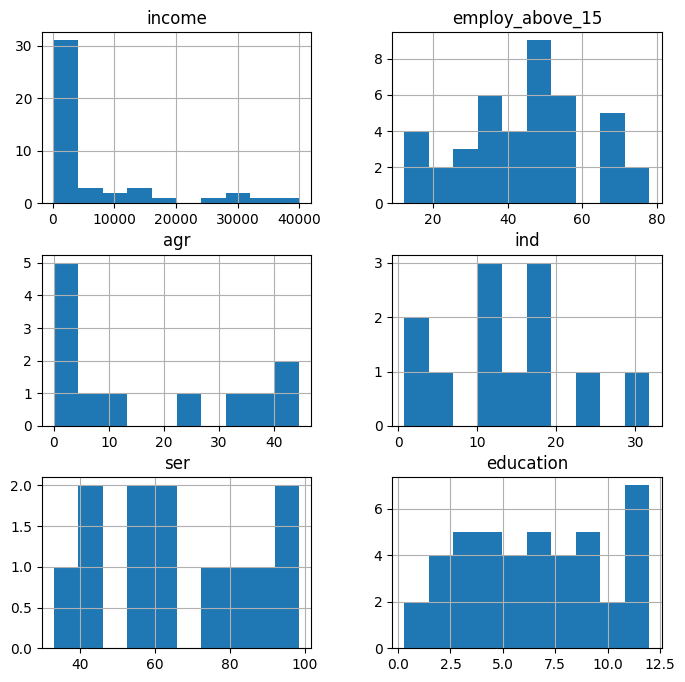

In [65]:
asia_pac.hist(figsize=(8, 8));

Considering that the missing values for `education` and `employ_above_15` represented approximately 20% of the countries in the region, it was concluded that there was too much variability in the data to justify the use of naive surrogates. Additionally, the `income` variable was also found to be highly skewed, further complicating the application of this approach. As a result, alternative strategies for managing missing values would need to be explored for these variables to ensure a more accurate and reliable analysis.

**Eastern Europe**

In [66]:
east_eur = df.query('region == "Eastern Europe"')
east_eur.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 1 to 193
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          21 non-null     object 
 1   income           21 non-null     float64
 2   employ_above_15  18 non-null     float64
 3   agr              15 non-null     float64
 4   ind              15 non-null     float64
 5   ser              15 non-null     float64
 6   education        20 non-null     float64
 7   region           21 non-null     object 
dtypes: float64(6), object(2)
memory usage: 1.5+ KB


In [67]:
percent_missing_data(east_eur)

country             0.000000
income              0.000000
employ_above_15    14.285714
agr                28.571429
ind                28.571429
ser                28.571429
education           4.761905
region              0.000000
dtype: float64

The relatively small amount of missing data indicated that the use of naive surrogates might have been appropriate for this region. This suggests that there could be enough stability in the data to justify central-value substitutions for managing the missing values, potentially enhancing the analysis without significantly distorting the overall findings. Therefore, further consideration could be given to applying naive surrogates for the relevant variables in this context.

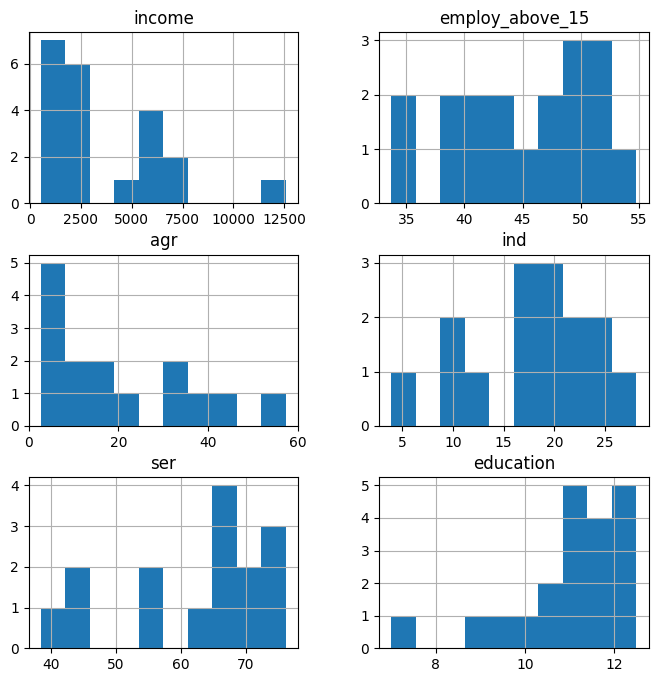

In [68]:
east_eur.hist(figsize=(8, 8));

Both the `education` variable (using the median) and `employ_above_15` met the necessary criteria for the use of naive surrogates, while the `income` variable was found to be too skewed for this approach.

Although it could have been appropriate to apply naive surrogates for the ind sector, this strategy was not suitable for the other sectors. Ultimately, it was concluded that maintaining a fully comparable dataset for all three sectors was more advantageous. This meant that only countries with data for all three sectors would be included in the analysis, and no substitutions were made for missing values. This decision ensured the consistency and integrity of the dataset across all employment sectors.

**Latin America and Caribbean**

In [69]:
lat_am = df.query('region == "Latin America and Caribbean"')
lat_am.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 5 to 214
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          31 non-null     object 
 1   income           29 non-null     float64
 2   employ_above_15  26 non-null     float64
 3   agr              17 non-null     float64
 4   ind              17 non-null     float64
 5   ser              17 non-null     float64
 6   education        27 non-null     float64
 7   region           31 non-null     object 
dtypes: float64(6), object(2)
memory usage: 2.2+ KB


In [70]:
percent_missing_data(lat_am)

country             0.000000
income              6.451613
employ_above_15    16.129032
agr                45.161290
ind                45.161290
ser                45.161290
education          12.903226
region              0.000000
dtype: float64

Due to the significant amounts of missing data, it was anticipated that substitution would not be feasible. However, a check was conducted to confirm this expectation. This review aimed to assess the extent of the missing data and determine whether any viable options for substitution might still be available. Ultimately, this verification process helped ensure that the analysis was based on the most accurate and comprehensive dataset possible.

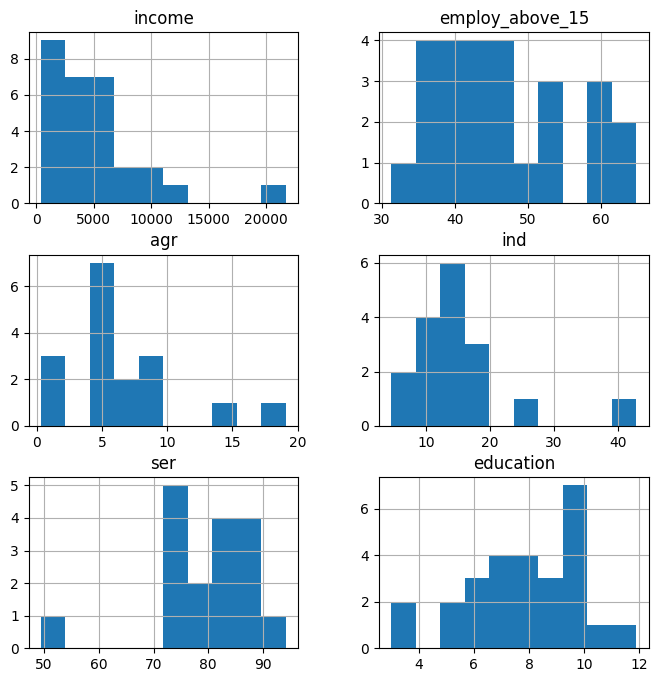

In [71]:
lat_am.hist(figsize=(8, 8));

Based on this information, it was concluded that no substitutions would be made for the missing values. This decision was made to maintain the integrity of the dataset and ensure that the analysis relied solely on the available data, thereby avoiding any potential distortions that could arise from substituting missing values.

**Western Europe and Other**

In [72]:
west_eur_other = df.query('region == "Western Europe and Other"')
west_eur_other.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 3 to 196
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          29 non-null     object 
 1   income           29 non-null     float64
 2   employ_above_15  25 non-null     float64
 3   agr              24 non-null     float64
 4   ind              24 non-null     float64
 5   ser              24 non-null     float64
 6   education        23 non-null     float64
 7   region           29 non-null     object 
dtypes: float64(6), object(2)
memory usage: 2.0+ KB


In [73]:
percent_missing_data(west_eur_other)

country             0.000000
income              0.000000
employ_above_15    13.793103
agr                17.241379
ind                17.241379
ser                17.241379
education          20.689655
region              0.000000
dtype: float64

Given the relatively low amounts of missing data, it was determined that substitution might be feasible. This possibility opened the door for using techniques like naive surrogates to manage the missing values, potentially enhancing the dataset without significantly compromising the overall analysis. Further examination would be necessary to identify the most suitable approach for substitution in this context.

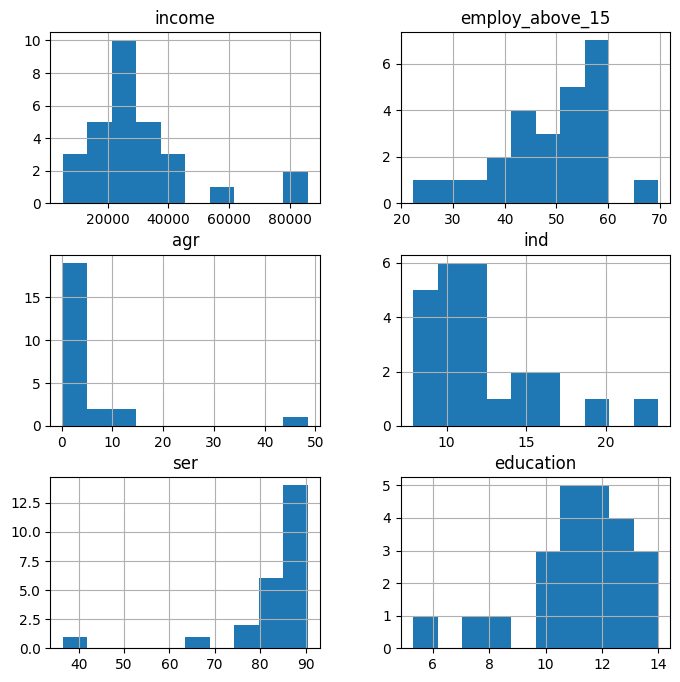

In [74]:
west_eur_other.hist(figsize=(8, 8));

The `income` variable was found to be reasonably symmetrical, making it suitable for the use of naive surrogates. In contrast, while the `education` variable also exhibited a reasonable degree of symmetry, the median was chosen as a substitute to minimize the impact of the left tail. This approach aimed to provide a more robust representation of the data while addressing the skewness present in the distribution. Thus, both variables were managed effectively to enhance the overall dataset for analysis.

**non-UN**

In [75]:
non_un = df.query('region == "non-UN"')
non_un.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 19 to 33
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          2 non-null      object 
 1   income           1 non-null      float64
 2   employ_above_15  0 non-null      float64
 3   agr              1 non-null      float64
 4   ind              1 non-null      float64
 5   ser              1 non-null      float64
 6   education        0 non-null      float64
 7   region           2 non-null      object 
dtypes: float64(6), object(2)
memory usage: 144.0+ bytes


In [76]:
percent_missing_data(non_un)

country              0.0
income              50.0
employ_above_15    100.0
agr                 50.0
ind                 50.0
ser                 50.0
education          100.0
region               0.0
dtype: float64

Given the extent of the missing data, it was determined that substituting values for any of these variables would not be appropriate. This decision was made to preserve the integrity of the dataset, ensuring that the analysis remained grounded in the actual observed data rather than potentially distorting it through substitutions. As a result, the focus would remain on utilizing only the available data for a more accurate and reliable analysis. 

#### Check duplicate data

In [77]:
df.nunique()

country            215
income             193
employ_above_15    145
agr                 70
ind                 70
ser                 79
education          102
region               6
dtype: int64

There were no duplicate countries in the dataset, which was anticipated based on the datasets utilized. Although there were duplicate values across the other variables, this was not a concern since the values for each variable in each row (country) are independent of the values for other countries. This independence ensures that the analysis remains valid, as each country's data is treated separately without influence from duplicates in the variable values.

#### Normality checks
Since scatterplots and correlations are among the analytical tools to be used, the overall variables (rather than examining them by region) were assessed for normality. This examination aimed to determine whether the data distributions of the variables adhered to the assumptions of normality, which is important for the validity of the statistical analyses that would follow. Understanding the distribution of each variable helps in selecting appropriate methods for analysis and interpreting the results accurately.

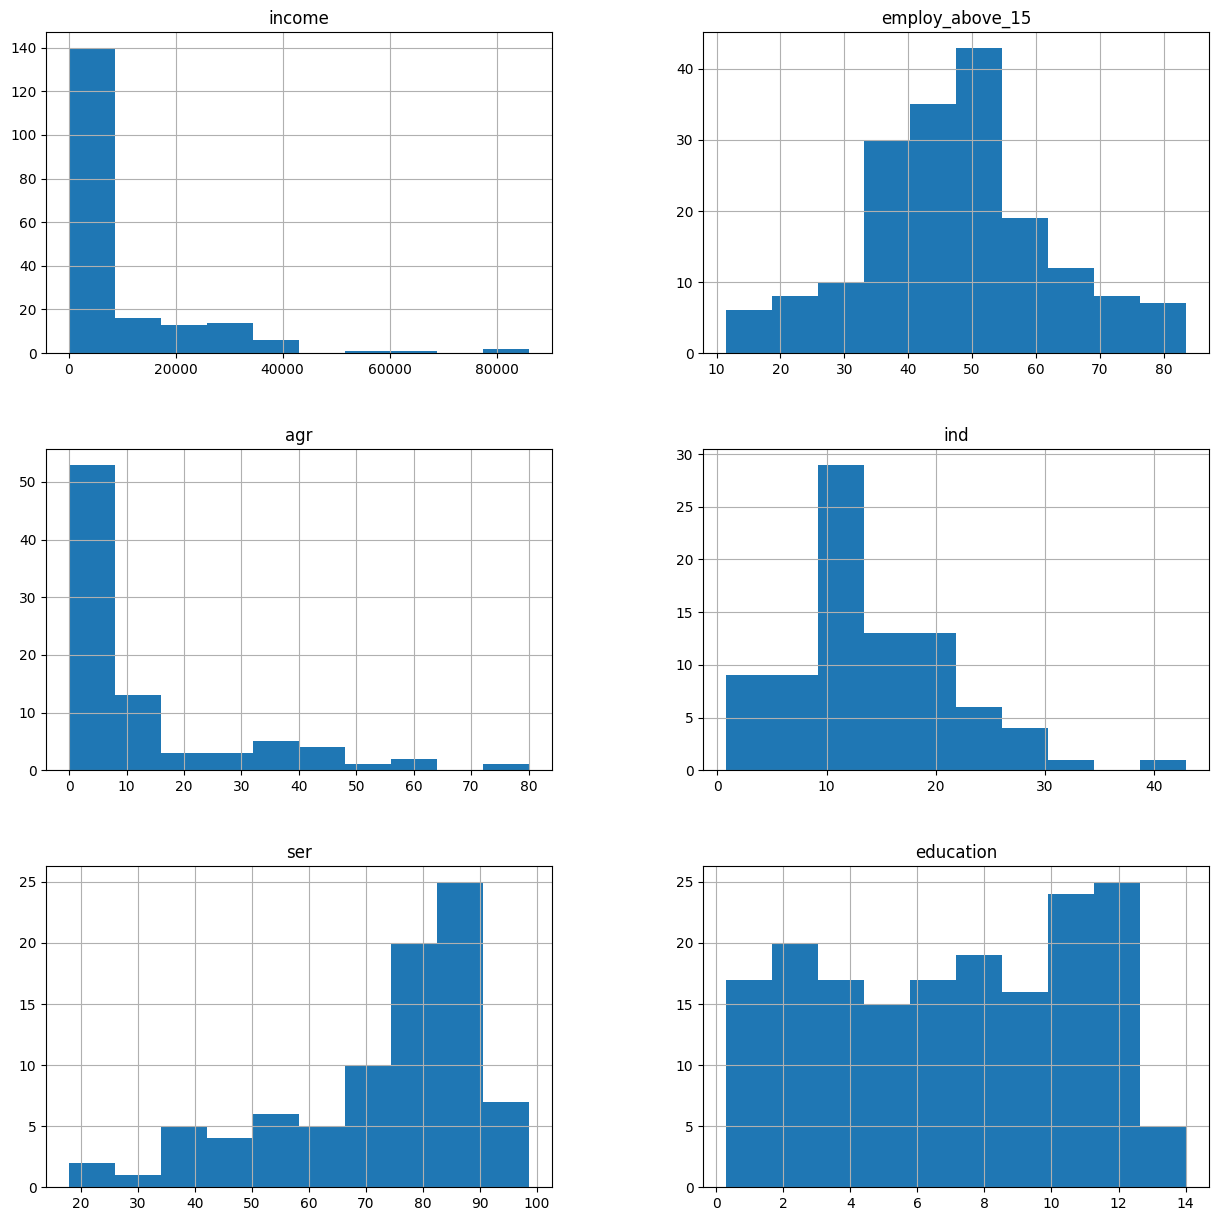

In [78]:
df.hist(figsize=(15, 15));

In [79]:
print('income: ', df.income.skew(), df.income.kurtosis())
print('employ: ', df.employ_above_15.skew(), df.employ_above_15.kurtosis())
print('agr: ', df.agr.skew(), df.agr.kurtosis())
print('ind: ', df.ind.skew(), df.ind.kurtosis())
print('ser: ', df.ser.skew(), df.ser.kurtosis())
print('education: ', df.education.skew(), df.education.kurtosis())

income:  2.6390133368515807 8.773337394671467
employ:  0.05955560836899337 0.12360310962985954
agr:  1.934606068186565 3.500775756422366
ind:  0.8949231530911632 1.6623344542647573
ser:  -1.0756056182380256 0.5751799419556471
education:  -0.09499617812394506 -1.2796036280929386


The [Acceptable ranges](https://www.researchgate.net/post/What_is_the_acceptable_range_of_skewness_and_kurtosis_for_normal_distribution_of_data) for skewness and kurtosis are typically ±2.

- The **income** variable exhibited significant right skewness, with values ranging from 0 to 8000, which supports the decision to utilize log-GDP in the ILO report.
- Both **employ_above_15** and **education** fell within the acceptable limits for normality.
- The **agr** variable was just within acceptable limits for skewness but significantly exceeded them for kurtosis.
- The **ind** variable was skewed to the right, while **ser** was skewed to the left; however, both remained within acceptable limits for both skewness and kurtosis.

Given these observations, both `income` and `agr` were identified as suitable candidates for log transformation. It was also noted that if the transformation effectively corrected the skewness in income, the use of naive surrogates might be appropriate for some regions.

Before proceeding with the transformations, the data was saved for future reference.

In [80]:
df.to_csv('raw_combined_df.csv', index=False)

### Data Cleaning
#### `income` Log Transformation

The initial log transformation resulted in negative values for `NaN` and 0, which complicated further analysis. To address this issue, a function was developed to handle these cases separately. This function ensures that the log transformation is applied appropriately, maintaining the integrity of the dataset by avoiding negative values and allowing for a smoother analytical process. This approach facilitates accurate calculations and interpretations in subsequent analyses.

In [81]:
df = pd.read_csv('raw_combined_df.csv')
df.head()

country        income  employ_above_15  agr  ind  ser  education  \
0  Afghanistan           NaN        26.200001  NaN  NaN  NaN        0.3   
1      Albania   1594.495067        41.900002  NaN  NaN  NaN        8.9   
2      Algeria   2124.957754        30.500000  NaN  NaN  NaN        3.8   
3      Andorra  21595.395480              NaN  NaN  NaN  NaN        NaN   
4       Angola    473.136344        69.199997  NaN  NaN  NaN        2.5   

                     region  
0              Asia-Pacific  
1            Eastern Europe  
2                    Africa  
3  Western Europe and Other  
4                    Africa

In [82]:
def conditional_fillna(x):
    if x == np.nan:
        x = np.nan
    if x == 0:
        x = 0
    else:
        x = np.log(x)
    return x

In [83]:
df['log_income'] = df.income.apply(conditional_fillna)
df.head()

country        income  employ_above_15  agr  ind  ser  education  \
0  Afghanistan           NaN        26.200001  NaN  NaN  NaN        0.3   
1      Albania   1594.495067        41.900002  NaN  NaN  NaN        8.9   
2      Algeria   2124.957754        30.500000  NaN  NaN  NaN        3.8   
3      Andorra  21595.395480              NaN  NaN  NaN  NaN        NaN   
4       Angola    473.136344        69.199997  NaN  NaN  NaN        2.5   

                     region  log_income  
0              Asia-Pacific         NaN  
1            Eastern Europe    7.374312  
2                    Africa    7.661507  
3  Western Europe and Other    9.980235  
4                    Africa    6.159384

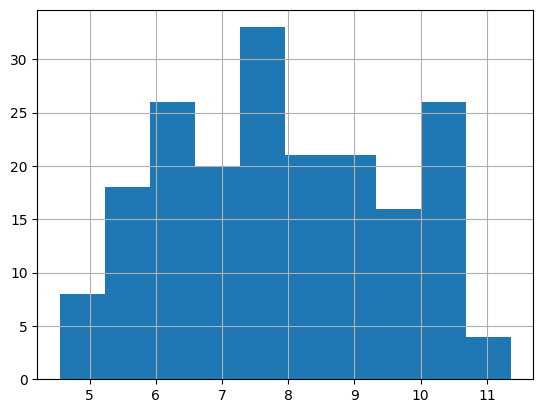

In [84]:
df.log_income.hist();

In [85]:
print(df.log_income.skew(), df.log_income.kurtosis())

0.08442981695014368 -1.0115948921880529


The log transformation significantly normalized the income data, validating its suitability for the dataset.

With the data now exhibiting a more normal distribution, the log_income variable was subsequently assessed for normality across each region. This examination aimed to determine whether the transformation had effectively addressed any skewness and whether the data met the assumptions necessary for subsequent analyses, such as correlation and regression. By evaluating the normality of `log_income` within each region, the analysis could ensure robust statistical conclusions could be drawn.

In [86]:
regions_log_income = df.groupby('region')['log_income']

In [87]:
regions_log_income.mean()

region
Africa                          6.437729
Asia-Pacific                    7.729932
Eastern Europe                  7.892543
Latin America and Caribbean     8.162121
Western Europe and Other       10.153568
non-UN                         11.088745
Name: log_income, dtype: float64

In [88]:
regions_log_income.max() - regions_log_income.min()

region
Africa                         4.075262
Asia-Pacific                   5.402328
Eastern Europe                 3.167452
Latin America and Caribbean    4.034223
Western Europe and Other       2.813779
non-UN                         0.000000
Name: log_income, dtype: float64

In [89]:
regions_log_income.skew()

region
Africa                         0.778926
Asia-Pacific                   0.484321
Eastern Europe                 0.041681
Latin America and Caribbean   -0.318974
Western Europe and Other      -0.386101
non-UN                              NaN
Name: log_income, dtype: float64

In [90]:
regions_log_income.apply(lambda x: x.kurtosis())

region
Africa                        -0.611914
Asia-Pacific                  -0.775717
Eastern Europe                -0.818993
Latin America and Caribbean    0.091394
Western Europe and Other       1.679451
non-UN                              NaN
Name: log_income, dtype: float64

Based on the previous analysis, `log_income` was found to fall within acceptable normality ranges for all regions, except for the `non-UN` category. It was also observed that the range for log_income was sufficiently small across most regions, with the exception of Asia-Pacific, which prompted considerations for data substitution.

Upon re-examining the number of missing values for `log_income` in each region, the following decisions were made regarding the handling of missing data:
- Africa: Substitute missing values with the **mean** of `log_income`.
- Asia-Pacific: **No substitution** was performed due to the high variability of `log_income` and the significant amount of missing data.
- Eastern Europe: Substitute missing values with the **mean** of `log_income`.
- Latin America and the Caribbean: Substitute missing values with the **mean** of `log_income`.
- Western Europe and Other: Substitute missing values with the **mean** of `log_income`.
These determinations aim to ensure that the dataset remains robust while addressing the missing data effectively across the various regions.

#### `agr` Log Transformation

In [91]:
df['log_agr'] = df.agr.apply(conditional_fillna)
df.head(10)

country        income  employ_above_15        agr   ind  \
0          Afghanistan           NaN        26.200001        NaN   NaN   
1              Albania   1594.495067        41.900002        NaN   NaN   
2              Algeria   2124.957754        30.500000        NaN   NaN   
3              Andorra  21595.395480              NaN        NaN   NaN   
4               Angola    473.136344        69.199997        NaN   NaN   
5  Antigua and Barbuda  12452.282040              NaN        NaN   NaN   
6            Argentina   8717.176296        45.799999   0.300000  10.9   
7              Armenia   1253.813300        33.700001  46.099998   9.5   
8            Australia  24295.081380        54.599998   2.400000   9.1   
9              Austria  26171.690910        49.400002   5.700000  13.4   

         ser  education                       region  log_income   log_agr  
0        NaN        0.3                 Asia-Pacific         NaN       NaN  
1        NaN        8.9               Eastern Europe    7.374312       NaN  
2        NaN        3.8                       Africa    7.661507       NaN  
3        NaN        NaN     Western Europe and Other    9.980235       NaN  
4        NaN        2.5                       Africa    6.159384       NaN  
5        NaN       11.9  Latin America and Caribbean    9.429659       NaN  
6  88.500000        9.8  Latin America and Caribbean    9.073051 -1.203973  
7  44.500000       11.0               Eastern Europe    7.133945  3.830813  
8  88.199997       11.3     Western Europe and Other   10.098029  0.875469  
9  80.900002       10.7     Western Europe and Other   10.172434  1.740466

In [92]:
df.log_agr.hist();

In [93]:
print(df.log_agr.skew(), df.log_agr.kurtosis())

-0.2160712946936606 -0.6510757598921275


The log transformation effectively normalized the income data, validating its appropriateness for the dataset. This transformation significantly reduced skewness, allowing for a more accurate analysis of the relationships between variables. The improved distribution of the `log_income` variable enhances the reliability of any subsequent statistical analyses conducted using this data.

#### Complete substitutions

The following substitutions were performed for each region:

**Africa**
- `employ_above_15`: NaN values were replaced with the mean.
- `log_income`: NaN values were replaced with the mean.

**Asia-Pacific**
- No substitutions were made.

**Eastern Europe**
- `employ_above_15`: NaN values were replaced with the mean.
- `log_income`: NaN values were replaced with the mean.
- `education`: NaN values were replaced with the median.

**Latin America and Caribbean**
- `log_income`: NaN values were replaced with the mean.

**Western Europe and Other**
- `log_income`: NaN values were replaced with the mean.
- `education`: NaN values were replaced with the median.

In [94]:
region_mean = df.groupby('region')['log_income'].mean()
region_mean

region
Africa                          6.437729
Asia-Pacific                    7.729932
Eastern Europe                  7.892543
Latin America and Caribbean     8.162121
Western Europe and Other       10.153568
non-UN                         11.088745
Name: log_income, dtype: float64

Functions were created to conditionally replace missing values based on the specific region and the target variable. These functions streamlined the process of managing NaN values, ensuring that the appropriate substitution methods (mean or median) were applied based on the predefined criteria for each region and variable. This approach enhanced the efficiency and accuracy of data cleaning, facilitating further analysis without compromising the integrity of the dataset.

In [95]:
def fill_mean(df, name, column_target):
    region_mean = df.groupby('region')[column_target].mean()
    df['new_column'] = df.loc[df['region'] == name][column_target].fillna(region_mean.loc[name])
    df[column_target].fillna(df['new_column'], inplace=True)
    df.drop('new_column', axis=1, inplace=True)

In [96]:
def fill_median(df, name, column_target):
    region_median = df.groupby('region')[column_target].median()
    df['new_column'] = df.loc[df['region'] == name][column_target].fillna(region_median.loc[name])
    df[column_target].fillna(df['new_column'], inplace=True)
    df.drop('new_column', axis=1, inplace=True)

In [97]:
fill_mean(df, 'Africa', 'log_income')
fill_mean(df, 'Africa', 'employ_above_15')

The data was reviewed to confirm that the substitutions were executed correctly. This involved checking for any remaining NaN values in the relevant variables and ensuring that the substituted values were accurately reflected in the dataset. This validation step ensured that the data was now complete and ready for subsequent analysis.

In [98]:
df.loc[df['region'] == 'Africa'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 2 to 206
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          49 non-null     object 
 1   income           47 non-null     float64
 2   employ_above_15  49 non-null     float64
 3   agr              6 non-null      float64
 4   ind              6 non-null      float64
 5   ser              6 non-null      float64
 6   education        47 non-null     float64
 7   region           49 non-null     object 
 8   log_income       49 non-null     float64
 9   log_agr          6 non-null      float64
dtypes: float64(8), object(2)
memory usage: 4.2+ KB


This validation process was carried out for each of the regions, systematically checking the relevant variables to ensure that all missing values had been appropriately substituted. Each region was examined individually to confirm that the data was now complete, allowing for reliable and consistent analysis moving forward.

In [99]:
fill_mean(df, 'Eastern Europe', 'log_income')
fill_mean(df, 'Eastern Europe', 'employ_above_15')
fill_median(df, 'Eastern Europe', 'education')

In [100]:
df.loc[df['region'] == 'Eastern Europe'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 1 to 193
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          21 non-null     object 
 1   income           21 non-null     float64
 2   employ_above_15  21 non-null     float64
 3   agr              15 non-null     float64
 4   ind              15 non-null     float64
 5   ser              15 non-null     float64
 6   education        21 non-null     float64
 7   region           21 non-null     object 
 8   log_income       21 non-null     float64
 9   log_agr          15 non-null     float64
dtypes: float64(8), object(2)
memory usage: 1.8+ KB


In [101]:
fill_mean(df, 'Latin America and Caribbean', 'log_income')

In [102]:
df.loc[df['region'] == 'Latin America and Caribbean'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 5 to 214
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          31 non-null     object 
 1   income           29 non-null     float64
 2   employ_above_15  26 non-null     float64
 3   agr              17 non-null     float64
 4   ind              17 non-null     float64
 5   ser              17 non-null     float64
 6   education        27 non-null     float64
 7   region           31 non-null     object 
 8   log_income       31 non-null     float64
 9   log_agr          17 non-null     float64
dtypes: float64(8), object(2)
memory usage: 2.7+ KB


In [103]:
fill_mean(df, 'Western Europe and Other', 'log_income')
fill_median(df, 'Western Europe and Other', 'education')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          215 non-null    object 
 1   income           193 non-null    float64
 2   employ_above_15  184 non-null    float64
 3   agr              85 non-null     float64
 4   ind              85 non-null     float64
 5   ser              85 non-null     float64
 6   education        182 non-null    float64
 7   region           181 non-null    object 
 8   log_income       197 non-null    float64
 9   log_agr          85 non-null     float64
dtypes: float64(8), object(2)
memory usage: 16.9+ KB


As a result of the substitutions, the data sets showed significant improvements in completeness for the key variables:

- `log_income`: Increased from 193 to 201 values.
- `employ_above_15`: Increased from 178 to 185 values.
- `education`: Increased from 175 to 183 values.

These adjustments have enhanced the datasets, facilitating more robust analyses and comparisons across regions.

#### Sort for alphabetical country order
After merging the datasets, the countries were no longer in a consistent order. To address this, the countries were sorted alphabetically for improved clarity and easier navigation within the dataset.

In [105]:
df.tail()

country  income  employ_above_15        agr   ind        ser  \
210  Korea, Rep.     NaN        48.599998   8.600000  16.0  75.300003   
211   Kyrgyzstan     NaN        48.700001  35.400002  10.7  53.799999   
212         Laos     NaN        78.099998        NaN   NaN        NaN   
213  Yemen, Rep.     NaN        20.500000        NaN   NaN        NaN   
214  Saint Lucia     NaN              NaN        NaN   NaN        NaN   

     education                       region  log_income   log_agr  
210       11.4                          NaN         NaN  2.151762  
211       11.0                 Asia-Pacific         NaN  3.566712  
212        2.3                 Asia-Pacific         NaN       NaN  
213        0.6                          NaN         NaN       NaN  
214        9.0  Latin America and Caribbean    8.162121       NaN

In [106]:
df.sort_values('country', inplace=True)
df.tail()

country      income  employ_above_15        agr  ind  \
201  West Bank and Gaza         NaN        11.500000  34.299999  8.8   
203               Yemen  573.895709              NaN        NaN  NaN   
213         Yemen, Rep.         NaN        20.500000        NaN  NaN   
204              Zambia  372.083676        53.900002        NaN  NaN   
205            Zimbabwe  351.172047        58.799999        NaN  NaN   

           ser  education        region  log_income   log_agr  
201  55.299999        7.3           NaN         NaN  3.535145  
203        NaN        NaN  Asia-Pacific    6.352448       NaN  
213        NaN        0.6           NaN         NaN       NaN  
204        NaN        4.8        Africa    5.919119       NaN  
205        NaN        6.2        Africa    5.861276       NaN

The cleaned data was saved to a new file. 

In [107]:
df.to_csv('clean_df.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

An initial assessment of the relationships among the data was performed, followed by a detailed examination of each of the original research questions. This approach allowed for a structured analysis, ensuring that each question was addressed comprehensively based on the insights gathered from the dataset.

In [108]:
df = pd.read_csv('clean_df.csv')
df.head()

country        income  employ_above_15  agr  ind  ser  education  \
0  Afghanistan           NaN        26.200001  NaN  NaN  NaN        0.3   
1      Albania   1594.495067        41.900002  NaN  NaN  NaN        8.9   
2      Algeria   2124.957754        30.500000  NaN  NaN  NaN        3.8   
3      Andorra  21595.395480              NaN  NaN  NaN  NaN       11.6   
4       Angola    473.136344        69.199997  NaN  NaN  NaN        2.5   

                     region  log_income  log_agr  
0              Asia-Pacific         NaN      NaN  
1            Eastern Europe    7.374312      NaN  
2                    Africa    7.661507      NaN  
3  Western Europe and Other    9.980235      NaN  
4                    Africa    6.159384      NaN

In [109]:
df.query('country == "Germany" or country == "United States"')

country       income  employ_above_15  agr   ind        ser  \
69         Germany  24463.84647        46.099998  1.6  16.1  82.199997   
204  United States  38349.39879        56.000000  0.8   9.4  89.800003   

     education                    region  log_income   log_agr  
69        11.7  Western Europe and Other   10.104952  0.470004  
204       13.5  Western Europe and Other   10.554494 -0.223144

In [110]:
pd.plotting.scatter_matrix(df, figsize=(15, 15));

The analysis revealed several noteworthy relationships between the variables:

**Positive Relationships**:
- There is a positive correlation between log_agriculture (`log_agr`) and the service sector (`ser`), indicating that higher income levels are associated with increased educational attainment.
- A positive relationship was also observed between `log_income` and `ser`, suggesting that as income rises, the contribution of the service sector to the economy tends to increase.

**Negative Relationships**:
- A negative correlation exists between log_agriculture (`log_agr`) and the service sector (`ser`), indicating that a higher reliance on the service sector is associated with lower agricultural employment.
- Additionally, a negative relationship was found between `log_income` and `log_agr`, suggesting that higher income levels are linked to lower levels of agricultural employment.

These relationships provide valuable insights into the dynamics between economic strength, education, and employment sectors.

### Research Question 1: How does economic strength vary globally?

In [111]:
df.log_income.describe()

count    197.000000
mean       7.900085
std        1.648940
min        4.551450
25%        6.441132
50%        7.785196
75%        9.210970
max       11.361436
Name: log_income, dtype: float64

In [112]:
plt.subplots(figsize=(8, 6))
df.log_income.hist(grid=False)
plt.title("Distribution of Income per Person Across the Globe \n", fontsize=18)
plt.xlabel("\n log of gdp per person in 2000USD", fontsize=14)
plt.ylabel("Number of Countries \n", fontsize=14);

The logarithm of income per person (GDP) varied between 4.55 and 11.36, with a global average of 7.89, showing a fairly normal distribution.

Next, income per person was examined at the country level.

In [113]:
df.sort_values('log_income', ascending=False, inplace=True)

In [114]:
ind = np.arange(len(df.country[:-22]))
labels = list(df.country[:-22])
plt.subplots(figsize=(4, 45))
plt.barh(ind, df.log_income[:-22])
plt.title("Global Income per Person 2006", fontsize=18)
plt.xlabel("log of gdp per person in 2000USD", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.yticks(ind, labels);

Unfortunately, this approach did not yield a clear means of interpretation, prompting a shift to analyzing the data at the regional level.

In [115]:
region_income = df.groupby('region')['log_income']

region_income.mean()

region
Africa                          6.437729
Asia-Pacific                    7.729932
Eastern Europe                  7.892543
Latin America and Caribbean     8.162121
Western Europe and Other       10.153568
non-UN                         11.088745
Name: log_income, dtype: float64

In [116]:
region_income.std()

region
Africa                         1.155485
Asia-Pacific                   1.462538
Eastern Europe                 0.828270
Latin America and Caribbean    0.861485
Western Europe and Other       0.572171
non-UN                              NaN
Name: log_income, dtype: float64

In [117]:
region_income.max() - region_income.min()

region
Africa                         4.075262
Asia-Pacific                   5.402328
Eastern Europe                 3.167452
Latin America and Caribbean    4.034223
Western Europe and Other       2.813779
non-UN                         0.000000
Name: log_income, dtype: float64

In [118]:
region_income.count()

region
Africa                         49
Asia-Pacific                   45
Eastern Europe                 21
Latin America and Caribbean    31
Western Europe and Other       29
non-UN                          1
Name: log_income, dtype: int64

A function was developed to ensure consistent formatting of boxplots.

The following resources were consulted to create the chart:
- Fill boxes: https://stackoverflow.com/questions/20289091/python-matplotlib-filled-boxplots
- Individual coloring: https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color/41997865

In [119]:
def format_boxplot(format_dict, color):
    '''Formats boxplot after boxplot has been plotted to have box colors according to the color argument.
       With grey whiskers, black caps and white medians and means.
    Args:
        format_dict: formatting dictionary variable.
        color: array like list of colors.
    Returns:
        None.
    '''
    for i in range(len(color)):
        plt.setp(format_dict['boxes'][i], color=color[i])
        
    plt.setp(format_dict['whiskers'], color='grey')
    plt.setp(format_dict['caps'], color='black')
    plt.setp(format_dict['medians'], color='white')
    plt.setp(format_dict['means'], color='white')

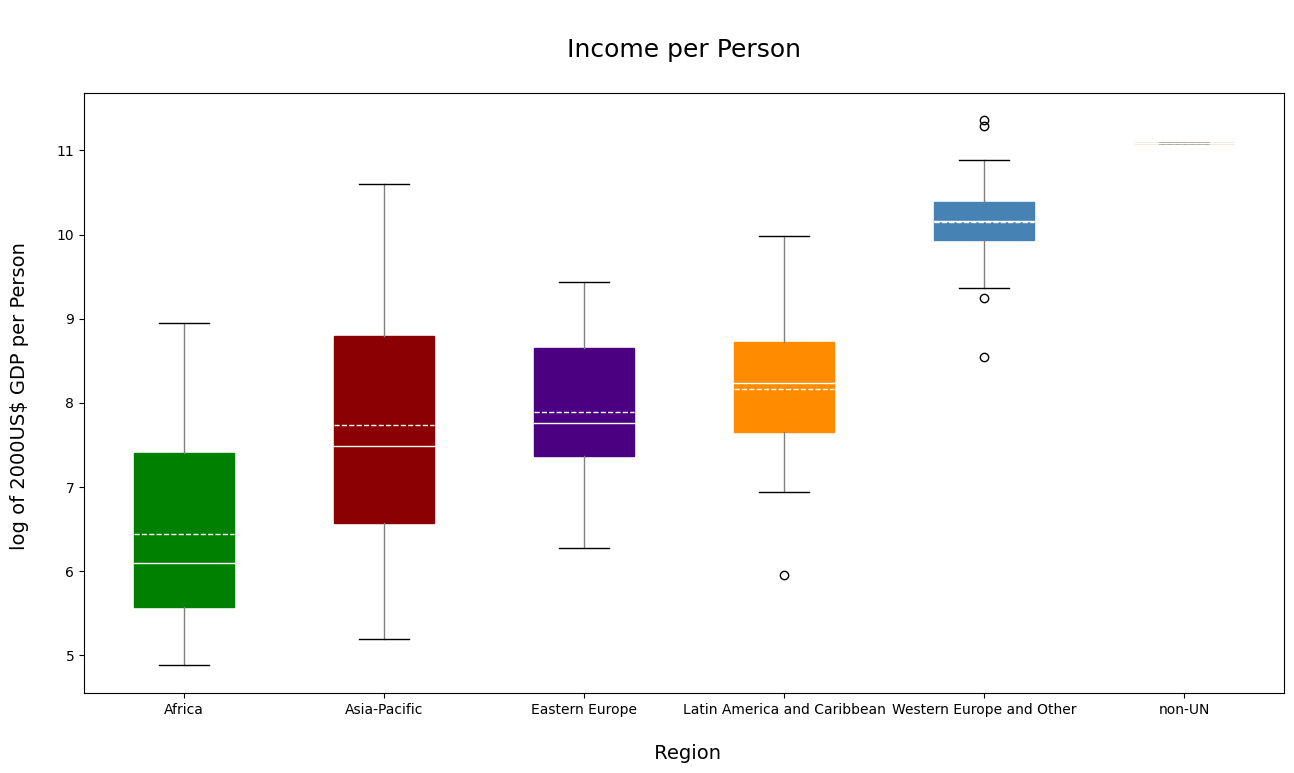

In [120]:
bp = df[['region', 'log_income']].boxplot(by='region', showmeans=True, meanline=True, figsize=(15, 8), patch_artist=True, grid=False, return_type='dict')
plt.title('\n Income per Person \n', fontsize=18)
plt.suptitle("")
plt.xlabel('\n Region', fontsize=14)
plt.ylabel('log of 2000US$ GDP per Person \n', fontsize=14);

#because of the grouping that was used for the boxplot, the formatting dictionary is found in bp['log_income']
color = ['#008000', '#8B0000', '#4B0082', '#FF8C00', '#4682B4', '#B8860B']
format_boxplot(bp['log_income'], color)

**Observations:** Average regional income per person varied, with Africa having the lowest average ($\mu$ = 6.42) and Western Europe and Other reporting the highest ($\mu$ = 10.15). The eight non-UN countries showed a smaller range in income data, with a similar mean of per person income ($\mu$ = 9.95), although their dataset was right-skewed.

As the average income per person for a region increased, the variability in income tended to decrease. Africa and Asia-Pacific had the lowest means ($\mu$ = 7.63) and the highest variability. In contrast, Eastern Europe ($\mu$ = 7.92) and Latin America and the Caribbean ($\mu$ = 8.22) exhibited moderate income levels and variability. Western Europe and Other had the highest mean income per person and the lowest variability among UN regions.

**Question Answer:** Economically strong countries are more likely to be located in the Western Europe and Other region, while they are less likely to be found in the Africa and Asia-Pacific UN regions.

### Research Question 2: How does women's participation in the workforce differ across various regions?

#### Employment Participation

Female labor force participation (FLFP) rates were analyzed across the UN regions.

In [121]:
region_employ = df.groupby('region')['employ_above_15']

region_employ.mean()

region
Africa                         52.778261
Asia-Pacific                   44.729268
Eastern Europe                 45.200000
Latin America and Caribbean    46.319231
Western Europe and Other       48.908000
non-UN                               NaN
Name: employ_above_15, dtype: float64

In [122]:
region_employ.std()

region
Africa                         17.491985
Asia-Pacific                   16.732173
Eastern Europe                  5.589812
Latin America and Caribbean     9.444576
Western Europe and Other       10.593745
non-UN                               NaN
Name: employ_above_15, dtype: float64

In [123]:
region_employ.max() - region_employ.min()

region
Africa                         65.500002
Asia-Pacific                   65.799998
Eastern Europe                 21.099998
Latin America and Caribbean    33.600002
Western Europe and Other       47.399998
non-UN                               NaN
Name: employ_above_15, dtype: float64

In [124]:
region_employ.count()

region
Africa                         49
Asia-Pacific                   41
Eastern Europe                 21
Latin America and Caribbean    26
Western Europe and Other       25
non-UN                          0
Name: employ_above_15, dtype: int64

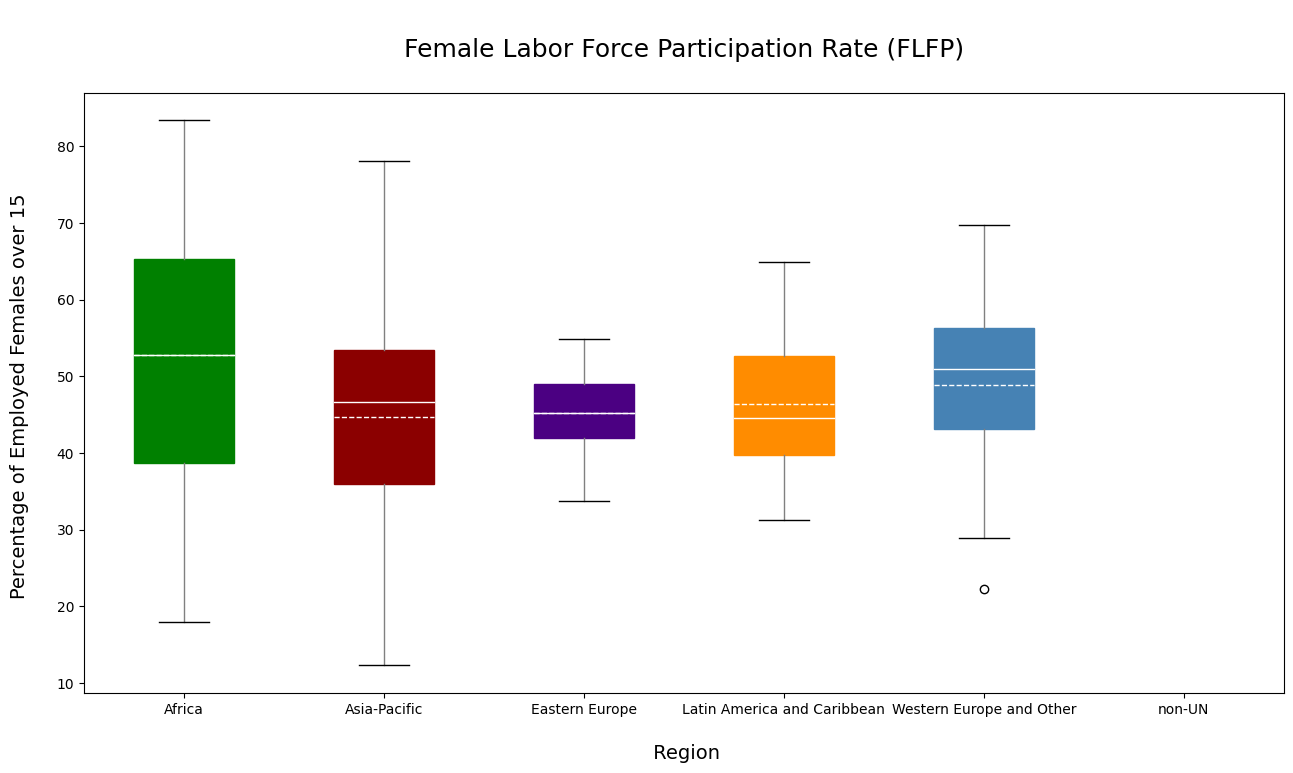

In [125]:
bp = df[['region', 'employ_above_15']].boxplot(by='region', showmeans=True, meanline=True, figsize=(15, 8), patch_artist=True, grid=False, return_type='dict')
plt.title('\n Female Labor Force Participation Rate (FLFP) \n', fontsize=18)
plt.suptitle("")
plt.xlabel('\n Region', fontsize=14)
plt.ylabel('Percentage of Employed Females over 15 \n', fontsize=14);

format_boxplot(bp['employ_above_15'], color)

In [126]:
df.query('region == "non-UN"')

country       income  employ_above_15  agr  ind   ser  education  \
19         Bermuda  65430.60131              NaN  NaN  NaN   NaN        NaN   
33  Cayman Islands          NaN              NaN  1.0  3.6  95.5        NaN   

    region  log_income  log_agr  
19  non-UN   11.088745      NaN  
33  non-UN         NaN      0.0

**Observations:** Although the average female labor force participation (FLFP) rates across the UN regions were relatively similar, ranging from 43.9% in Asia-Pacific to 52.9% in Africa, there was significant variability in FLFP between the regions. Eastern Europe exhibited the most consistent FLFP, while Africa and Asia-Pacific demonstrated the greatest variability.

Furthermore, since the UN regions are arranged in order of increasing income per person in the accompanying chart, comparisons can be made between FLFP and income levels from the boxplots. It is evident that as income per person increases, the variability in FLFP decreases, showing a range of approximately 20% among countries in Eastern Europe, before rising again with further increases in income per person.

This indicates that, when considering income per person alongside the UN regions, there is an indication of a U-shaped relationship between income and FLFP. However, comparisons between the FLFP of non-UN countries and their income per person cannot be made, as the data for these variables is typically not available in tandem.

**Question Answer:** The highest rates of female workforce participation are found in the African and Western Europe and Other regions. In countries that reported data, females are least likely to participate in the workforce if their country is not part of the UN. Among UN regions, FLFP is lowest in the Asia-Pacific and Eastern Europe regions. Overall, labor force participation appears to correlate with a U-shaped relationship to economic strength when examining the UN regions.

#### Employment Sector

This section examines female participation in the agricultural, industrial, and service sectors across UN regions.

In [127]:
region_agr = df.groupby('region')['agr']
region_ind = df.groupby('region')['ind']
region_ser = df.groupby('region')['ser']

region_agr.mean()

region
Africa                         26.500000
Asia-Pacific                   17.358333
Eastern Europe                 19.980000
Latin America and Caribbean     6.511765
Western Europe and Other        4.841667
non-UN                          1.000000
Name: agr, dtype: float64

In [128]:
region_ind.mean()

region
Africa                         13.966666
Asia-Pacific                   13.575000
Eastern Europe                 17.653333
Latin America and Caribbean    15.000000
Western Europe and Other       12.287500
non-UN                          3.600000
Name: ind, dtype: float64

In [129]:
region_ser.mean()

region
Africa                         56.000000
Asia-Pacific                   66.075000
Eastern Europe                 62.266666
Latin America and Caribbean    79.364706
Western Europe and Other       82.591667
non-UN                         95.500000
Name: ser, dtype: float64

In [130]:
region_total = region_agr.mean() + region_ind.mean() + region_ser.mean()
region_total

region
Africa                          96.466667
Asia-Pacific                    97.008334
Eastern Europe                  99.899999
Latin America and Caribbean    100.876471
Western Europe and Other        99.720833
non-UN                         100.100000
dtype: float64

In [131]:
other = 100 - region_total
other

region
Africa                         3.533333
Asia-Pacific                   2.991666
Eastern Europe                 0.100001
Latin America and Caribbean   -0.876471
Western Europe and Other       0.279167
non-UN                        -0.100000
dtype: float64

In [132]:
other.loc['Latin America and Caribbean'] = 0
other

region
Africa                         3.533333
Asia-Pacific                   2.991666
Eastern Europe                 0.100001
Latin America and Caribbean    0.000000
Western Europe and Other       0.279167
non-UN                        -0.100000
dtype: float64

Counts by region were conducted to assess the comparability of the information.

In [133]:
df[['region', 'ser', 'ind', 'ser']].groupby('region').count()

ser  ind  ser
region                                    
Africa                         6    6    6
Asia-Pacific                  12   12   12
Eastern Europe                15   15   15
Latin America and Caribbean   17   17   17
Western Europe and Other      24   24   24
non-UN                         1    1    1

The available data for employment sectors was compared to the regional data for income.

In [134]:
df.groupby('region')['ser'].count()/region_income.count()*100

region
Africa                          12.244898
Asia-Pacific                    26.666667
Eastern Europe                  71.428571
Latin America and Caribbean     54.838710
Western Europe and Other        82.758621
non-UN                         100.000000
dtype: float64

Although it was not confirmed whether the same countries were reporting, the number of countries providing employment sector information was significantly lower for the Africa, Asia-Pacific, and Latin America and Caribbean regions. Consequently, confidence in region-specific analyses for these areas is limited.

Moreover, due to the comparatively higher representation of Eastern Europe and Western Europe and Other, caution should be exercised when interpreting the relationships between employment sectors and other variables.

In [135]:
N = 6
service = region_ser.mean()
industry = region_ind.mean()
agriculture = region_agr.mean()
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.subplots(figsize=(12, 6))
p1 = plt.bar(ind, service, width, color='#4ea4d8')
p2 = plt.bar(ind, industry, width, bottom=service, color='#f79029')
p3 = plt.bar(ind, agriculture, width, bottom=industry+service, color='#8dc182')
p4 = plt.bar(ind, other, width, bottom=agriculture+industry+service, color='#dac09a')

plt.title('\n Female Participation in Employment Sectors \n', fontsize=18)
plt.xlabel('\n Region', fontsize=14)
plt.ylabel('Percentage Employment \n', fontsize=14)
plt.xticks(ind, ('Africa', 'Asia-Pacific', 'Eastern Europe', 'Latin America \n and Caribbean', 'Western Europe \n and Other', 'non-UN'))
plt.yticks(np.arange(0, 101, 10))
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Service', 'Industrial', 'Agricultural', 'Other'), bbox_to_anchor=(1.05, 1));

**Observations:** Africa had the highest proportion of women working in the agricultural sector, with over one-third of employed females in this field. In contrast, all other regions reported less than 20% of females employed in agriculture. Additionally, Africa had the lowest proportion of women in the service sector, with just over half of employed women in this category. Conversely, most other regions had more than two-thirds of females working in the service sector, with the highest proportions observed in the Latin America and Caribbean, and Western Europe and Other regions.

Eastern Europe stands out among all regions, as it has the largest relative number of females employed in the industrial sector, along with the second highest proportion of women in the agricultural sector.

(Note: The data for the Latin America and Caribbean region was slightly adjusted to ensure that the sum of the sectors did not exceed 100%.)

**Question Answer:** The type of employment that women engage in appears to be related to economic strength, with greater participation in service industries correlating with higher economic strength.

### Research Question 3: How does women's participation in education change around the world?

In [136]:
region_education = df.groupby('region')['education']

region_education.mean()

region
Africa                          3.285106
Asia-Pacific                    6.476744
Eastern Europe                 11.000000
Latin America and Caribbean     7.844444
Western Europe and Other       11.237931
non-UN                               NaN
Name: education, dtype: float64

In [137]:
region_education.std()

region
Africa                         2.388194
Asia-Pacific                   3.276310
Eastern Europe                 1.297305
Latin America and Caribbean    2.111568
Western Europe and Other       1.818244
non-UN                              NaN
Name: education, dtype: float64

In [138]:
region_education.max() - region_education.min()

region
Africa                         10.6
Asia-Pacific                   11.7
Eastern Europe                  5.5
Latin America and Caribbean     8.9
Western Europe and Other        8.7
non-UN                          NaN
Name: education, dtype: float64

In [139]:
region_education.count()

region
Africa                         47
Asia-Pacific                   43
Eastern Europe                 21
Latin America and Caribbean    27
Western Europe and Other       29
non-UN                          0
Name: education, dtype: int64

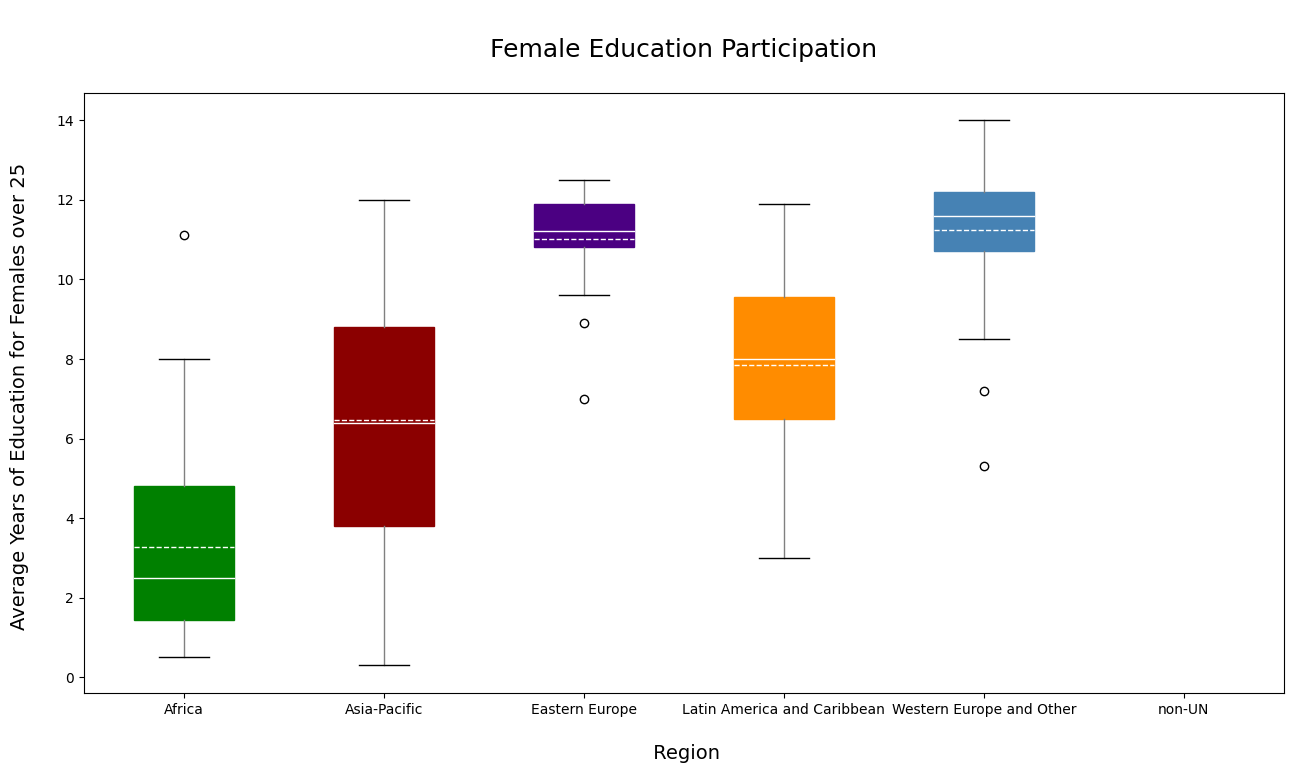

In [140]:
bp = df[['region', 'education']].boxplot(by='region', showmeans=True, meanline=True, figsize=(15, 8), patch_artist=True, grid=False, return_type='dict')
plt.title('\n Female Education Participation \n', fontsize=18)
plt.suptitle("")
plt.xlabel('\n Region', fontsize=14)
plt.ylabel('Average Years of Education for Females over 25 \n', fontsize=14);

format_boxplot(bp['education'], color)

**Observations:** With the exception of Eastern Europe, the regions were organized in order of increasing female education participation, with Africa exhibiting the lowest average female education participation (𝜇 = 3.30 years) and Western Europe the highest (𝜇 = 11.24), reflecting the trend of increasing economic strength.

Eastern Europe was similar to Western Europe and Other in terms of female education participation (𝜇 = 11.04) and exhibited the least variance in female education participation, followed by Western Europe and Other. These were the only two regions where countries reported average years of education completed by females exceeding 12 years.

The Asia-Pacific region demonstrated the greatest variability in female education participation.

Only two non-UN countries provided data on female education participation.

**Question Answer:** Generally, the pattern of female education participation aligns with relative economic strength. However, Eastern Europe does not conform to this trend, as it shows significantly higher female education participation compared to its economic strength.

### Research Question 4: Does the selected data support the theory of a U-shaped relationship between female labor force participation (FLFP) and economic strength?

To evaluate the proposed U-shaped relationship between a country’s female labor force participation (FLFP) and economic strength, countries were categorized into three quantiles based on their economic strength: low, medium, and high.

A one-way ANOVA was conducted to compare labor force participation among these three categories and confirm variations across regions.

To further investigate this relationship, three [Bonferroni corrected](https://en.wikipedia.org/wiki/Bonferroni_correction) t-tests were planned (where 
$p_i \, \leqslant \, \frac{\alpha}{m}$, $\alpha$ = 0.05) to test the following hypotheses:

Countries with high and low economic strength will demonstrate higher FLFP than those with medium economic strength.
The FLFP for countries with high and low economic strength will be similar.
The categories were formed by removing missing values on a pairwise basis.

In [141]:
low = df.query('log_income <= {}'.format(df.log_income.quantile(0.33))).employ_above_15.dropna()
med = df.query('log_income > {} and log_income <= {}'.format(df.log_income.quantile(0.33), df.log_income.quantile(0.66))).employ_above_15.dropna()
high = df.query('log_income > {}'.format(df.log_income.quantile(0.66))).employ_above_15.dropna()

The categorization procedure was verified to ensure that all relevant missing values were removed.

In [142]:
low.isnull().sum(), med.isnull().sum(), high.isnull().sum()

(0, 0, 0)

In [143]:
low.count(), med.count(), high.count()

(61, 53, 54)

These checks confirmed that all pairs of `log_income` and `employ_above_15` with missing values were removed, while no rows with missing values in other variables were excluded.

In [144]:
low_mean = low.mean()
med_mean = med.mean()
high_mean = high.mean()

low_mean, med_mean, high_mean

(54.82715581596579, 40.93773584981132, 46.44218986262883)

The means indicated that the first hypothesis was supported, while the second hypothesis may not have been supported.

The standard deviations of the categories were assessed to ensure that the assumptions of equal population variance for the ANOVA and t-tests were satisfied.

In [145]:
low_std = low.std()
med_std = med.std()
high_std = high.std()

low_std, med_std, high_std

(15.589237653956001, 12.433828214704711, 10.639456585258994)

The standard deviations were deemed sufficiently similar to justify the assumption of equal variance among the populations.

A one-way ANOVA was performed to verify the existence of a difference between the categories.

In [146]:
F, p = stats.f_oneway(low, med, high)
F, p

(16.16317004908068, 3.887387852358413e-07)

The results of the ANOVA confirmed that a difference existed between the categories, leading to the execution of the planned two-tailed independent t-tests with a Bonferroni correction of $\alpha$ = 0.01667.

In [147]:
0.05/3

0.016666666666666666

The following comparisons were conducted:
1. low v. medium
2. medium v. high
3. low v. high

In [148]:
t, p = stats.ttest_ind(low, med)
t, p

(5.204642108766188, 8.892092488617897e-07)

In [149]:
t, p = stats.ttest_ind(med, high)
t, p

(-2.4620018318293453, 0.015444102301824282)

In [150]:
t, p = stats.ttest_ind(low, high)
t, p

(3.3252219056344154, 0.0011919336961840276)

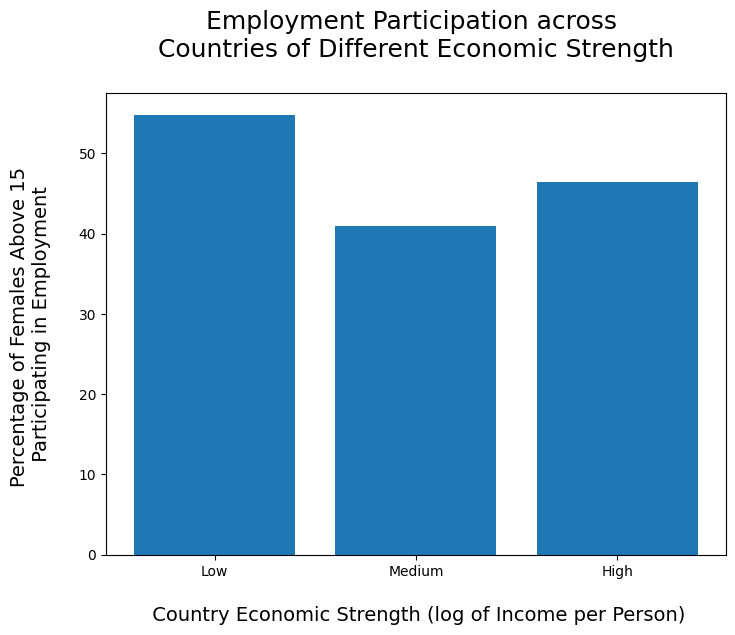

In [151]:
locations = [1, 2, 3]
heights = [low_mean, med_mean, high_mean]
labels = ['Low', 'Medium', 'High']
plt.subplots(figsize=(8, 6))
plt.bar(locations, heights, tick_label=labels)
plt.title('Employment Participation across \n Countries of Different Economic Strength \n', fontsize=18)
plt.xlabel('\n Country Economic Strength (log of Income per Person)', fontsize=14)
plt.ylabel('Percentage of Females Above 15 \n Participating in Employment \n', fontsize=14);

**Question Answer:** The t-tests supported the existence of a U-shaped relationship between a country's economic strength and FLFP. However, each category displayed distinct FLFP values. In countries with low economic strength, the average FLFP was 54.6%; for those with medium economic strength, it was 40.9%; and for countries with high economic strength, the average FLFP was 46.3%.

### Research Question 5: Is there a discernible relationship between employment sector and economic strength within the data?

Correlations were calculated between `log_income` and the three employment sector statistics: `log_agr`, `ind` and `ser`.

In [152]:
df[['log_income', 'log_agr', 'ind', 'ser']].corr()

log_income   log_agr       ind       ser
log_income    1.000000 -0.743716 -0.154234  0.716268
log_agr      -0.743716  1.000000  0.121209 -0.832298
ind          -0.154234  0.121209  1.000000 -0.217945
ser           0.716268 -0.832298 -0.217945  1.000000

The same pair-wise deletion procedure previously employed was utilized for testing the significance of the correlations.

In [153]:
inc_agr = df[['log_income', 'log_agr']].dropna()
r, p = stats.pearsonr(inc_agr['log_income'], inc_agr['log_agr'])
r, p

(-0.7437159577194317, 2.7321552086508276e-15)

[This](http://widu.tumblr.com/post/43624347354/matplotlib-trendline) resource was utilized to plot a scatter plot with a trendline.

y = -0.862368x + 9.119062


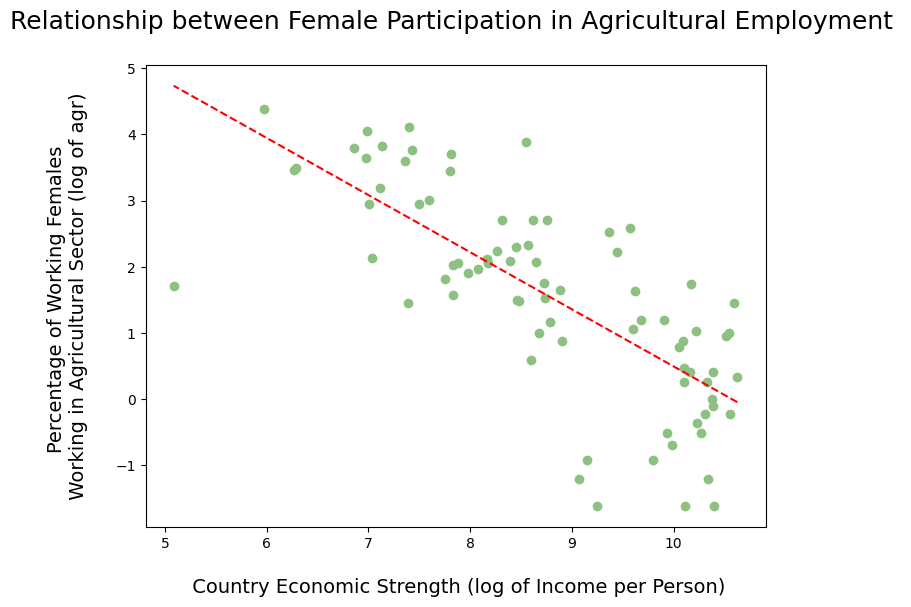

In [154]:
x = inc_agr['log_income']
y = inc_agr['log_agr']
plt.subplots(figsize=(8, 6))
plt.scatter(x, y, color='#8dc182')
plt.title('Relationship between Female Participation in Agricultural Employment \n', fontsize=18)
plt.xlabel('\n Country Economic Strength (log of Income per Person)', fontsize=14)
plt.ylabel('Percentage of Working Females \n Working in Agricultural Sector (log of agr) \n', fontsize=14);

def trendline(x, y):
    # calc the trendline
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    # the line equation:
    print("y = %.6fx + %.6f"%(z[0],z[1]))

trendline(x, y)

The test revealed a logarithmic negative correlation (r = -0.738) between the rate of female participation in agricultural sector employment and a country's economic strength.

This indicates that countries with higher economic strength tend to have fewer women working in agricultural sectors.

To visualize the logarithmic relationship between economic strength and female participation in the agricultural sector, a scatter plot of `arg` and `log_income` was created.

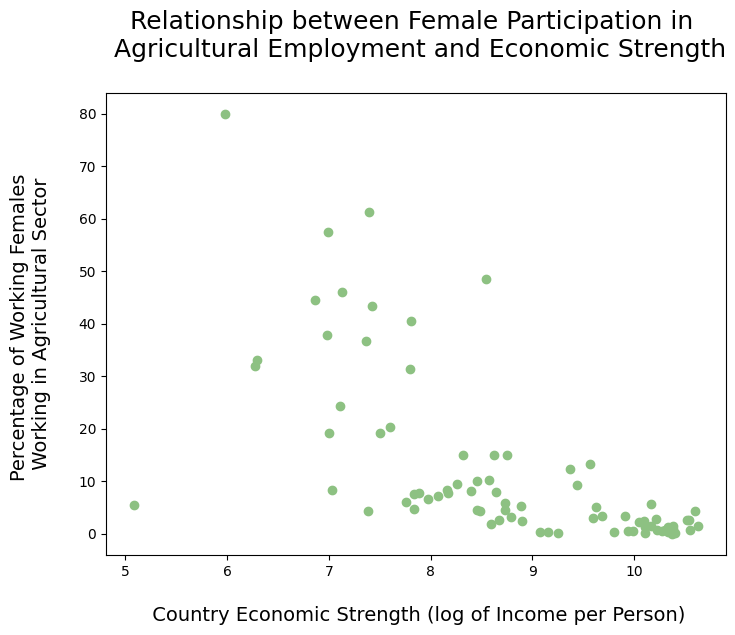

In [155]:
inc_agr = df[['log_income', 'agr']].dropna()
x = inc_agr['log_income']
y = inc_agr['agr']
plt.subplots(figsize=(8, 6))
plt.scatter(x, y, color='#8dc182')
plt.title('Relationship between Female Participation in \n Agricultural Employment and Economic Strength\n', fontsize=18)
plt.xlabel('\n Country Economic Strength (log of Income per Person)', fontsize=14)
plt.ylabel('Percentage of Working Females \n Working in Agricultural Sector \n', fontsize=14);

The correlation seemed to arise from increasing variation in participation in the agricultural sector among countries with lower economic strength, while countries with higher economic strength exhibited less variation.

In [156]:
inc_ind = df[['log_income', 'ind']].dropna()
r, p = stats.pearsonr(inc_ind['log_income'], inc_ind['ind'])
r, p

(-0.15423393562310853, 0.17194276054160448)

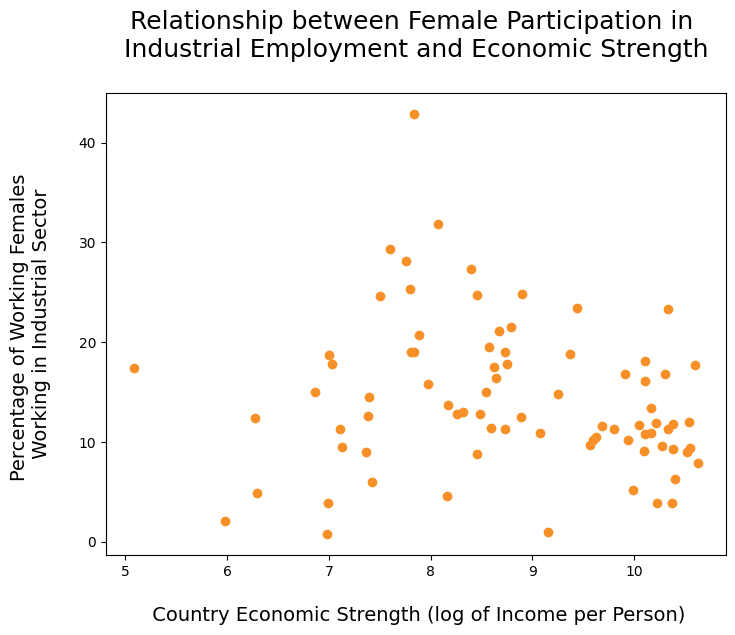

In [157]:
x = inc_ind['log_income']
y = inc_ind['ind']
plt.subplots(figsize=(8, 6))
plt.scatter(x, y, color='#f79029')
plt.title('Relationship between Female Participation in \n Industrial Employment and Economic Strength \n', fontsize=18)
plt.xlabel('\n Country Economic Strength (log of Income per Person)', fontsize=14)
plt.ylabel('Percentage of Working Females \n Working in Industrial Sector \n', fontsize=14);

No relationship was observed between a country's economic strength and female participation in the industrial sector.

In [158]:
inc_ser = df[['log_income', 'ser']].dropna()
r, p = stats.pearsonr(inc_ser['log_income'], inc_ser['ser'])
r, p

(0.7162676852152721, 8.06626906474318e-14)

y = 9.773646x + -12.860280


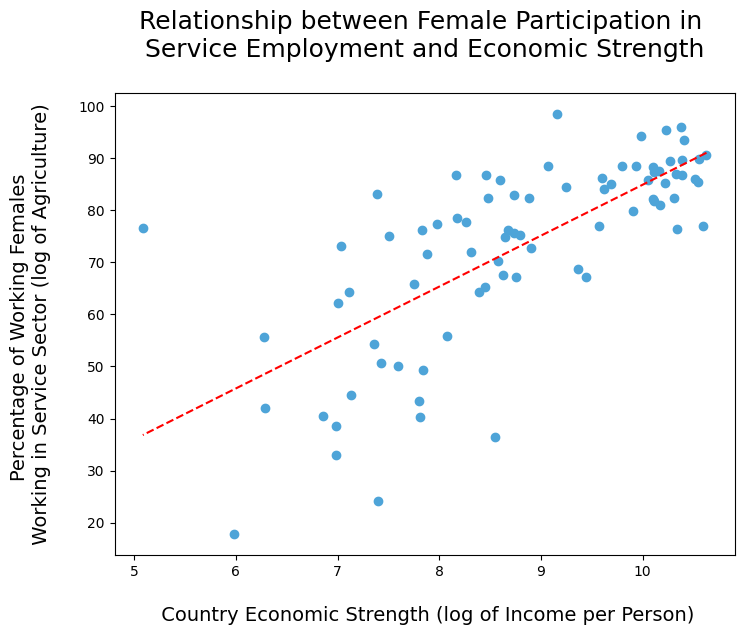

In [159]:
x = inc_ser['log_income']
y = inc_ser['ser']
plt.subplots(figsize=(8, 6))
plt.scatter(x, y, color='#4ea4d8')
plt.title('Relationship between Female Participation in \n Service Employment and Economic Strength \n', fontsize=18)
plt.xlabel('\n Country Economic Strength (log of Income per Person)', fontsize=14)
plt.ylabel('Percentage of Working Females \n Working in Service Sector (log of Agriculture) \n', fontsize=14);
trendline(x, y)

The test indicated a positive correlation (r = 0.716) between the rate of female participation in service sector employment and a country's economic strength.

This means that countries with higher economic strength tend to have more women working in service sectors.

**Question Answer:** There are significant relationships between female participation in both the agricultural and service sectors and a country's economic strength. Countries with higher economic strength tend to exhibit a higher rate of female employment in the service sector, indicating a shift toward more developed economies where service industries are more prominent. Conversely, these countries are likely to have lower female employment rates in the agricultural sector, reflecting a transition away from agriculture as a primary source of employment.

In contrast, the participation of females in the industrial sector shows more variability, with rates reaching up to approximately 30% across different countries. This suggests that while there is some level of female engagement in industrial employment, it does not exhibit the same strong correlation with economic strength as seen in the agricultural and service sectors. Overall, these trends highlight the dynamic nature of female labor force participation across various sectors in relation to a country's economic development.

### Research Question 6: Is there a positive correlation between economic strength and participation in education?

The correlation between a country's economic strength and female education participation was analyzed.

In [160]:
inc_ed = df[['log_income', 'education']].dropna()
r, p = stats.pearsonr(inc_ed['log_income'], inc_ed['education'])
r, p

(0.7267237784522182, 2.3010843371760363e-29)

y = 1.694818x + -6.011640


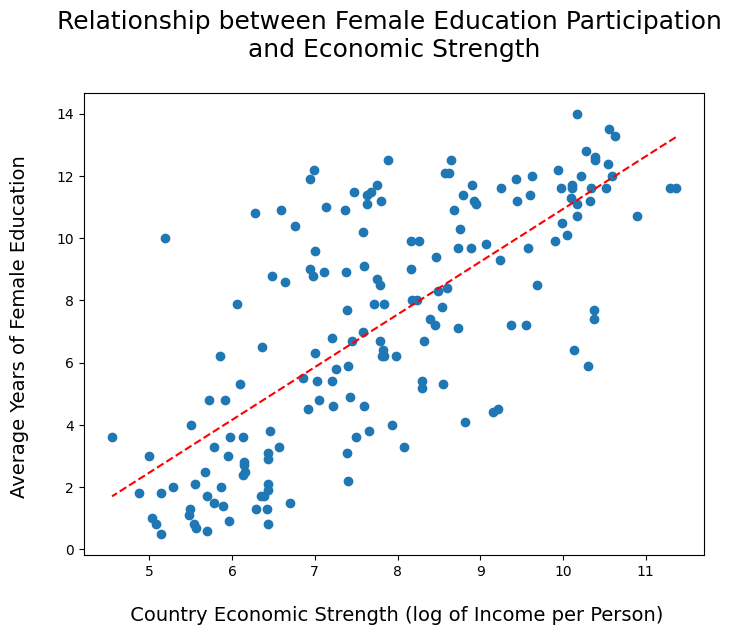

In [161]:
x = inc_ed['log_income']
y = inc_ed['education']
plt.subplots(figsize=(8, 6))
plt.scatter(x, y)
plt.title('Relationship between Female Education Participation \n and Economic Strength \n', fontsize=18)
plt.xlabel('\n Country Economic Strength (log of Income per Person)', fontsize=14)
plt.ylabel('Average Years of Female Education \n', fontsize=14);
trendline(x, y)

**Question Answer:** A highly significant positive correlation (r = 0.722) was found between a country's economic strength and female participation in education. This suggests that as a country's economic strength increases, female participation in education also tends to rise.

### Research Question 7: Does the selected data reveal relationships between education participation and overall FLFP, as well as within the three employment sectors?

#### Overall labor force participation

Correlations among `education`, `employ_above_15`, `log_agr`, `ind`, and `ser` were tested, with pair-wise deletions applied for each correlation to address missing values.

In [162]:
df[['education', 'employ_above_15', 'log_agr', 'ind', 'ser']].corr()

education  employ_above_15   log_agr       ind       ser
education         1.000000        -0.095231 -0.385708 -0.036428  0.412897
employ_above_15  -0.095231         1.000000 -0.150477 -0.028083  0.138388
log_agr          -0.385708        -0.150477  1.000000  0.121209 -0.832298
ind              -0.036428        -0.028083  0.121209  1.000000 -0.217945
ser               0.412897         0.138388 -0.832298 -0.217945  1.000000

In [163]:
ed_employ = df[['education', 'employ_above_15']].dropna()
r, p = stats.pearsonr(ed_employ['education'], ed_employ['employ_above_15'])
r, p

(-0.09523122443923947, 0.21671444421081473)

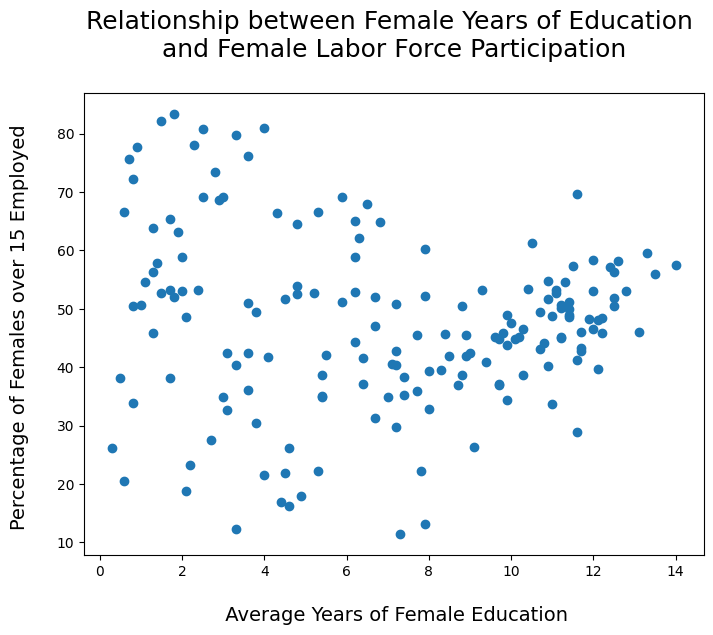

In [164]:
x = ed_employ['education']
y = ed_employ['employ_above_15']
plt.subplots(figsize=(8, 6))
plt.scatter(x, y)
plt.title('Relationship between Female Years of Education \n and Female Labor Force Participation \n', fontsize=18)
plt.xlabel('\n Average Years of Female Education', fontsize=14)
plt.ylabel('Percentage of Females over 15 Employed \n', fontsize=14);

It was noted that the relationship pattern between education participation and female labor force participation (FLFP) appeared similar to the relationship between economic strength and FLFP. To validate the differences among low, medium, and high education levels, a one-way ANOVA was performed following an assessment of the data's suitability.

In [165]:
low = df.query('education <= {}'.format(df.education.quantile(0.33))).employ_above_15.dropna()
med = df.query('education > {} and education <= {}'.format(df.education.quantile(0.33), df.education.quantile(0.66))).employ_above_15.dropna()
high = df.query('education > {}'.format(df.education.quantile(0.66))).employ_above_15.dropna()

low_mean = low.mean()
med_mean = med.mean()
high_mean = high.mean()

low_std = low.std()
med_std = med.std()
high_std = high.std()

print(low_mean, med_mean, high_mean)
print(low_std, med_std, high_std)

50.769637433449276 42.71454544263636 48.91051361230831
19.72086473339584 12.940611002042916 7.201651922558965


In [166]:
F, p = stats.f_oneway(low, med, high)
F, p

(4.823688665132438, 0.009191251537332952)

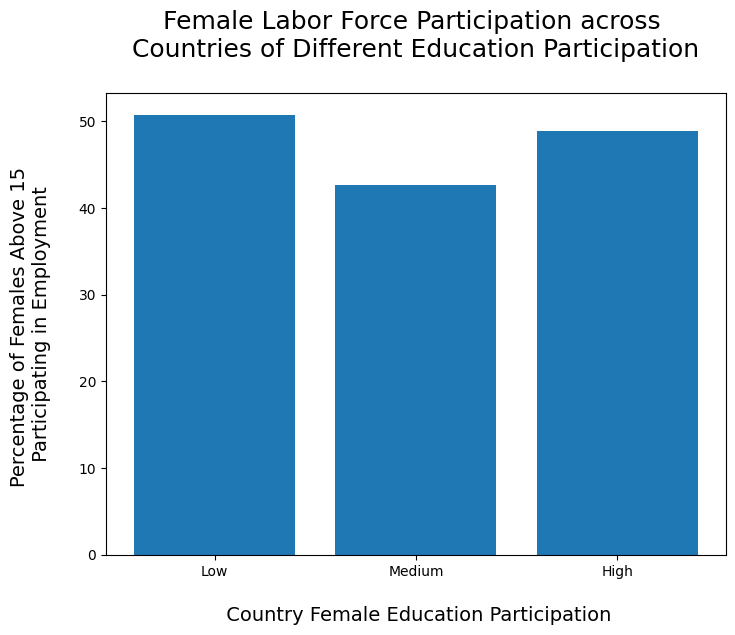

In [167]:
locations = [1, 2, 3]
heights = [low_mean, med_mean, high_mean]
labels = ['Low', 'Medium', 'High']
plt.subplots(figsize=(8, 6))
plt.bar(locations, heights, tick_label=labels)
plt.title('Female Labor Force Participation across \n Countries of Different Education Participation \n', fontsize=18)
plt.xlabel('\n Country Female Education Participation', fontsize=14)
plt.ylabel('Percentage of Females Above 15 \n Participating in Employment \n', fontsize=14);

**Question Answer:** The ANOVA confirmed a similar U-shaped pattern, with the FLFP for countries of low ($\mu$ = 50.8) and high ($\mu$ = 48.7) female education higher than countries of medium female education ($\mu$ = 42.7).

Question Answer: The ANOVA revealed a comparable U-shaped pattern, showing that the female labor force participation (FLFP) in countries with low ($\mu$ = 50.8) and high ($\mu$ = 48.7) levels of female education was greater than that in countries with medium levels of female education ($\mu$ = 42.7).

#### Employment Sector

The correlations between female education and participation in various employment sectors were analyzed.

In [168]:
ed_agr = df[['education', 'log_agr']].dropna()
r, p = stats.pearsonr(ed_agr['education'], ed_agr['log_agr'])
r, p

(-0.3857075812115221, 0.0004103376545600109)

y = -0.180426x + 3.416634


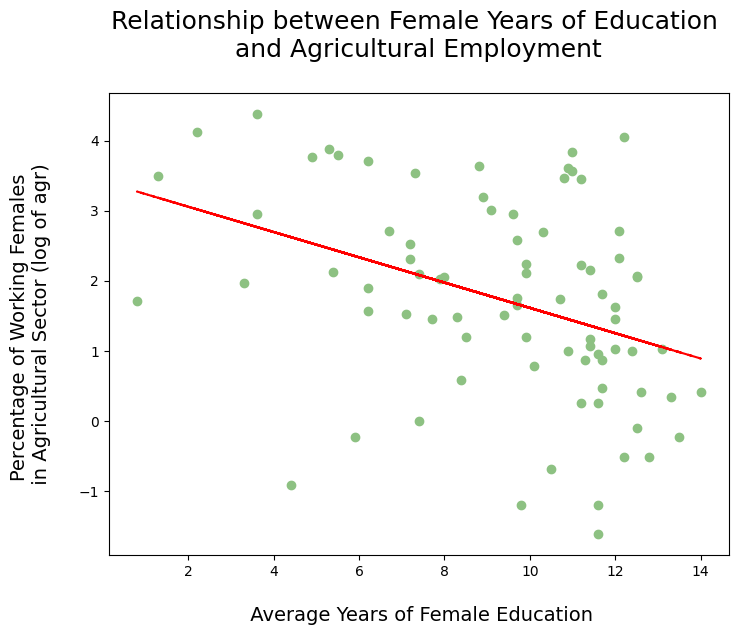

In [169]:
x = ed_agr['education']
y = ed_agr['log_agr']
plt.subplots(figsize=(8, 6))
plt.scatter(x, y, color='#8dc182')
plt.title('Relationship between Female Years of Education \n and Agricultural Employment \n', fontsize=18)
plt.xlabel('\n Average Years of Female Education', fontsize=14)
plt.ylabel('Percentage of Working Females \n in Agricultural Sector (log of agr) \n', fontsize=14);
trendline(x, y)

The analysis revealed a moderate logarithmic negative correlation (r = -0.386) between female education participation and female employment in the agricultural sector.

This indicates that countries with higher female education levels tend to have fewer women working in agricultural sectors.

To visualize the logarithmic relationship between education and female participation in the agricultural sector, a scatter plot of `arg` and `education` was created.

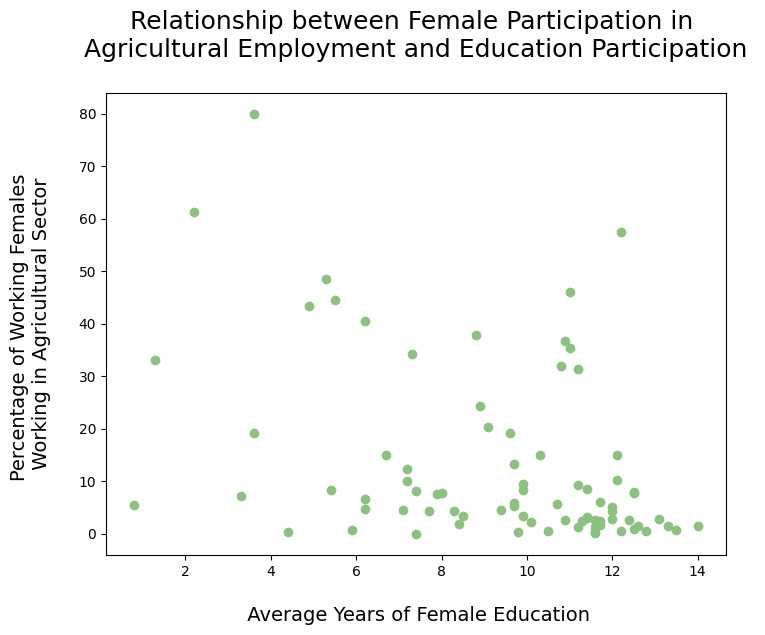

In [170]:
ed_agr = df[['education', 'agr']].dropna()
x = ed_agr['education']
y = ed_agr['agr']
plt.subplots(figsize=(8, 6))
plt.scatter(x, y, color='#8dc182')
plt.title('Relationship between Female Participation in \n Agricultural Employment and Education Participation \n', fontsize=18)
plt.xlabel('\n Average Years of Female Education', fontsize=14)
plt.ylabel('Percentage of Working Females \n Working in Agricultural Sector \n', fontsize=14);

The correlation seemed to stem from increasing variation in agricultural sector participation among countries with lower female education levels, while countries with higher female education exhibited less variation in this participation.

In [171]:
ed_ind = df[['education', 'ind']].dropna()
r, p = stats.pearsonr(ed_ind['education'], ed_ind['ind'])
r, p

(-0.0364284591555886, 0.7483585289705128)

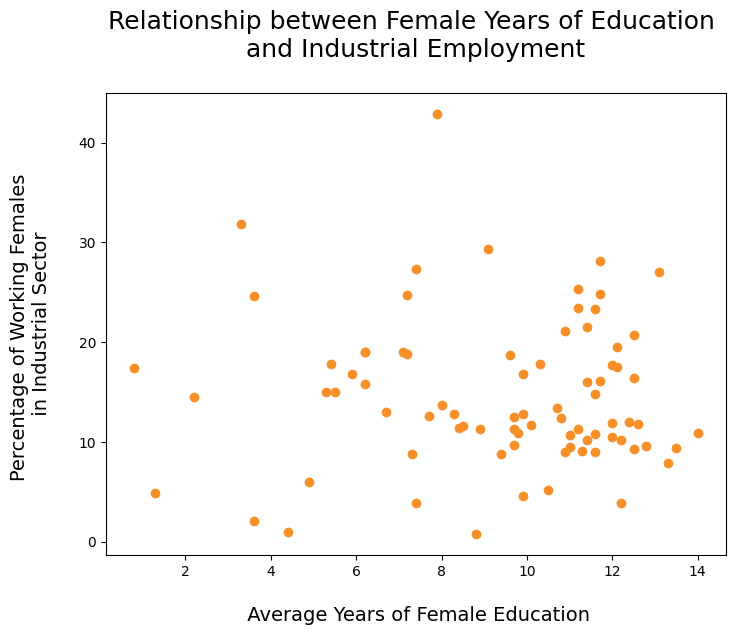

In [172]:
x = ed_ind['education']
y = ed_ind['ind']
plt.subplots(figsize=(8, 6))
plt.scatter(x, y, color='#f79029')
plt.title('Relationship between Female Years of Education \n and Industrial Employment \n', fontsize=18)
plt.xlabel('\n Average Years of Female Education', fontsize=14)
plt.ylabel('Percentage of Working Females \n in Industrial Sector \n', fontsize=14);

There was no relationship observed between a country's female education participation and female participation in the industrial sector.

In [173]:
ed_ser = df[['education', 'ser']].dropna()
r, p = stats.pearsonr(ed_ser['education'], ed_ser['ser'])
r, p

(0.4128967605461721, 0.00014109420220368237)

In [174]:
x = ed_ser['education']
y = ed_ser['ser']
plt.subplots(figsize=(8, 6))
plt.scatter(x, y, color='#4ea4d8')
plt.title('Relationship between Female Years of Education \n and Service Employment \n', fontsize=18)
plt.xlabel('\n Average Years of Female Education', fontsize=14)
plt.ylabel('Percentage of Working Females \n in Service Sector \n', fontsize=14);
trendline(x, y)

y = 2.401801x + 49.213640


The test showed that there was a moderate positive correlation (r = 0.413) between the rate of female participation in service sector employment and a country's female education participation.

That is, countries with higher female education participation have more women working in service sectors.

**Question Answer:** The relationships between female education participation and female participation in the three employment sectors is similar but less strong than the relationships between the employment sectors participation and a country's economic strength. 

Countries of higher female education are more likely to have high employment of females in the service sector and low employment in the agricultural sector. The participation of females in the industrial sector ranges up to approximately 30% across countries.

<a id='conclusions'></a>
## Conclusions

### Overview
The analysis uncovered the following relationships:
1. U-shaped Relationship: A U-shaped relationship exists between a country's economic strength and female labor force participation (FLFP), which aligns with the findings of the ILO report.
2. Negative Logarithmic Relationship: There is a negative logarithmic correlation between a country's economic strength and female employment in the agricultural sector, indicating that higher economic strength is associated with lower female participation in agriculture.
3. Positive Relationship with Service Sector Employment: A positive relationship was found between a country's economic strength and female employment in the service sector, suggesting that as economic strength increases, so does female participation in service-oriented jobs.
4. Positive Correlation with Female Education: The data reveals a positive correlation between a country's economic strength and female education levels, indicating that higher economic strength is linked to greater educational participation among females.
5. Similar Patterns with Reduced Correlations: A similar pattern of relationship was observed between education and all employment variables, although the correlations were generally reduced. This suggests that while education plays a role in employment outcomes, other factors may also influence these relationships.

#### Regional Data

**Region** | **Income** | **FLFP** | **Agr.** | **Ind.** | **Ser.** | **Education**
--- | --- | --- | --- | --- | --- | ---
**Africa** | 6.40 | 52.9 | 34.1 | 12.3 | 50.6 | 3.3
**Asia-Pacific** | 7.63 | 43.9 | 16.7 | 13.8 | 66.8 | 6.5
**Eastern Europe** | 7.92 | 44.0 | 18.1 | 19.2 | 62.6 | 11.0
**Latin American and Caribbean** | 8.22 | 46.1 | 6.5 | 15.0 | 79.4 | 7.8
**Western Europe and Other** | 10.15 | 48.9 | 4.8 | 12.3 | 82.6 | 11.2
**non-UN** | 9.95 | 39.8 | 6.1 | 8.7 | 85.0 | 8.8

### Impact of Education
The regional data indicates that the reduced correlation strength for education may be influenced by Eastern Europe's high female education participation, which does not align with its relatively lower economic strength and labor force participation. One hypothesis for Eastern Europe's increased education participation, compared to its economic status, is the proximity of these countries to Western European nations, which may have positively influenced educational access and participation.

Additionally, some of the weakened correlation might result from the varying effects of increased education on female labor force participation (FLFP) based on age, as suggested in the ILO report. However, the available data did not allow for an investigation of this age-related impact.

Nonetheless, the findings do support the ILO report's assertion that higher levels of education are generally linked to improved employment conditions. Specifically, the data shows that greater female education is associated with lower participation in agricultural employment and higher participation in the service sector.

### Type of Employment
The data corroborated the ILO findings regarding the relationship between economic health and the type of employment in which females participate. However, it did not demonstrate a sequential progression from agricultural to industrial to service sector employment. Instead, the expected negative relationship with agricultural employment and the positive relationship with service sector employment concerning economic health were evident, while no such relationship was observed for industrial employment.

The disproportionately high participation of females in industrial employment in Eastern Europe suggests that factors beyond a country’s economic strength and education levels may also play a role in determining the types of employment available. One hypothesis is that political ideologies could significantly influence the nature of work opportunities within these countries.

### Limitations
A notable limitation of this analysis is that more data is available for economically developed countries compared to their less developed counterparts, potentially skewing the results, especially regarding employment sector comparisons.

While there are theories regarding the causality of these findings, the data does not provide a basis for determining the direction of causality between female access to employment and economic strength, as longitudinal data was not included. The increased education levels in Eastern European countries suggest that enhanced educational access may precede economic strength, but this relationship cannot be confirmed definitively.

Another limitation stems from the intentional exclusion of data related to male participation in employment and education. Consequently, it is not possible to ascertain whether the observed patterns of employment, education, and economic strength for females mirror those of the general population or males, and thus are not solely a product of gender. Additionally, it remains unclear whether female participation in employment and education contributes uniquely to a country’s economic strength.

### Reflection
If more time were available for this project, several additional steps could be taken to enhance the quality and depth of the analysis. First, further data wrangling could focus on ensuring more consistency across the dataset, particularly regarding missing values and imbalanced data representation between regions. For example, implementing more advanced imputation techniques or exploring alternative datasets for underrepresented regions would help provide a fuller picture of global trends.

In terms of data exploration, I would delve deeper into specific variables, particularly around the influence of age on female labor force participation (FLFP) as suggested in previous literature. Conducting a more granular analysis of age groups within countries could reveal critical insights into the relationship between education, employment, and economic strength. Additionally, exploring longitudinal data to assess how changes in education and employment patterns evolve over time would allow for more robust conclusions about causality.

Further, incorporating male participation in employment and education would enable a gender-based comparison, adding depth to the analysis of female participation and its contribution to economic strength. Finally, expanding the scope of regional analyses and investigating political or cultural factors influencing employment types could provide more context for outliers like Eastern Europe, where education rates are high, but FLFP does not align with economic strength.

These additional steps would allow for a more comprehensive understanding of the data and offer a clearer picture of global trends in female labor force participation and its ties to economic and educational factors.

In [175]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Data_Wrangling_Project.ipynb

[NbConvertApp] Converting notebook Data_Wrangling_Project.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 28 image(s).
[NbConvertApp] Writing 2960696 bytes to Data_Wrangling_Project.html
